# DATA SET LOADING

In [ ]:
import kagglehub
path = kagglehub.dataset_download("tboyle10/medicaltranscriptions")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/medicaltranscriptions


In [ ]:
!pip install --upgrade spacy

  Using cached spacy-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
Using cached spacy-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.5 which is incompatible.


In [ ]:
!pip cache purge
!pip uninstall spacy -y
!pip install spacy

Files removed: 6
Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 41.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.5 which is incompatible.


In [ ]:
!pip uninstall spacy -y
!pip uninstall scispacy en-core-sci-md -y

Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5


In [ ]:
!pip install spacy==3.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [ ]:
!pip install en-core-sci-md==0.5.1

ERROR: Could not find a version that satisfies the requirement en-core-sci-md==0.5.1 (from versions: none)
ERROR: No matching distribution found for en-core-sci-md==0.5.1


# IMPORT STATEMENTS

In [ ]:
import nltk
from nltk import pos_tag
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from yellowbrick.text import PosTagVisualizer
import torch
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
data = pd.read_csv(path + "/mtsamples.csv")
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
print(data["transcription"][0])

SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,L

In [ ]:
def clinical_note(index):
    example = data[data.index == index][['transcription', 'medical_specialty']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Medical Specialty:', example[1])
clinical_note(15)

HISTORY OF PRESENT ILLNESS: ,I have seen ABC today for her preoperative visit for weight management.  I have explained to her the need for Optifast for weight loss prior to these procedures to make it safer because of the large size of her liver.  She understands this.,IMPRESSION/PLAN:, We are going to put her on two weeks of Optifast at around 900 calories.  I have also explained the risks and potential complications of laparoscopic cholecystectomy to her in detail including bleeding, infection, deep venous thrombosis, pulmonary embolism, injury to the small intestine, stomach, liver, leak from the cystic duct, common bile duct, and possible need for ERCP and further surgery.  This surgery is going to be planned for October 6.  This is for cholelithiasis prior to her Lap-Banding procedure.,I have also reviewed with her the risks and potential complications of laparoscopic gastric banding including bleeding, infection, deep venous thrombosis, pulmonary embolism, slippage of the band, e

#Preprocessing

In [ ]:
#Removal of special characters
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3526,3526,"GI Consultation for chronic abdominal pain, n...",Gastroenterology,GI Consultation - 2,"PROBLEM: ,Chronic abdominal pain, nausea, vom...",NaN
1291,1291,"Chronic laryngitis, hoarseness. The patient ...",Speech - Language,Laryngitis - Discharge,"DIAGNOSIS Chronic laryngitis, hoarseness.,HIST...","speech - language, vocal hygiene, voice activi..."
546,546,Right nodular malignant mesothelioma.,Surgery,Mesothelioma - Thoracotomy & Lobectomy,"PREOPERATIVE DIAGNOSIS Right mesothelioma.,PO...","surgery, double lumen endotracheal, en bloc re..."
1082,1082,Left endoscopic carpal tunnel release and end...,Surgery,Carpal Tunnel Release - 2,PREOPERATIVE DIAGNOSIS Left carpal tunnel synd...,"surgery, carpal tunnel syndrome, antebrachial ..."
1644,1644,EMG/Nerve Conduction Study showing sensory mo...,Radiology,EMG/Nerve Conduction Study - 4,NERVE CONDUCTION STUDIES Bilateral ulnar sens...,"radiology, emg, nerve conduction study, nerve ..."


In [ ]:
chars = [",", ".", "[", "]", ' / ', ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6", '__', '___', '____', '_____', '______', '_______']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
2562,2562,Repeat low transverse cesarean section and bi...,Obstetrics / Gynecology,Low-Transverse C-Section & BTL,PREOPERATIVE DIAGNOSIS Intrauterine pregnancy ...,"obstetrics / gynecology, placenta, low transve..."
4979,4979,Patient scheduled for laparoscopic gastric by...,Bariatrics,Gastric Bypass Discussion - 2,HISTORY The patient is scheduled for laparosco...,"bariatrics, medifast, laparoscopic gastric byp..."
2096,2096,Open reduction and internal fixation (ORIF) o...,Orthopedic,ORIF Wrist - Acumed Locking Plate,PREOPERATIVE DIAGNOSIS Closed displaced ang...,"orthopedic, open reduction, angulated fracture..."
4045,4045,Dental restoration. Dental caries. Caviti...,Dentistry,Dental Restoration,PREOPERATIVE DIAGNOSIS Dental caries POSTOPER...,"dentistry, cavities, carious lesions, throat p..."
903,903,Diagnostic laparoscopy. Acute pelvic inflam...,Surgery,Diagnostic Laparoscopy - 1,PREOPERATIVE DIAGNOSIS Acute abdominal pain r...,"surgery, periappendicitis, pelvic inflammatory..."


In [ ]:
# Ensure all entries are string and handle NaNs:
data["transcription"] = data["transcription"].fillna("").astype(str)

# Now apply the tokenizer safely:
data["tokenized_sents"] = data["transcription"].apply(word_tokenize)
data.sample(5)


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,tokenized_sents
2781,2781,Status post brain tumor removal. The patien...,Neurology,Physical Therapy - Brain Tumor Removal,DIAGNOSIS Status post brain tumor removal HI...,NaN,"[DIAGNOSIS, Status, post, brain, tumor, remova..."
3724,3724,This patient is one-day postop open parathyro...,ENT - Otolaryngology,Postop Parathyroid Exploration & Parathyroide...,SUMMARY This patient is one-day postop open...,"ent - otolaryngology, parathyroid hyperplasia,...","[SUMMARY, This, patient, is, one-day, postop, ..."
835,835,Esophagogastroduodenoscopy performed in the e...,Surgery,Esophagogastroduodenoscopy - 13,PROCEDURE PERFORMED Esophagogastroduodenoscopy...,"surgery, gi bleed, anemia, cirrhosis, stomach,...","[PROCEDURE, PERFORMED, Esophagogastroduodenosc..."
3458,3458,Umbilical hernia repair. A standard curviline...,Gastroenterology,Umbilical Hernia Repair - 1,PROCEDURE PERFORMED Umbilical hernia repair P...,"gastroenterology, fascial defect, umbilical he...","[PROCEDURE, PERFORMED, Umbilical, hernia, repa..."
3008,3008,Construction of right upper arm hemodialysis ...,Nephrology,Hemodialysis Fistula Construction,PREOPERATIVE DIAGNOSIS End-stage renal disease...,"nephrology, end-stage renal disease, av dialys...","[PREOPERATIVE, DIAGNOSIS, End-stage, renal, di..."


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
data['POSTags'].head(3)

,POSTags
0,"[(SUBJECTIVE, NNP), (This, DT), (-year-old, NN..."
1,"[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ..."
2,"[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL..."


In [ ]:
postags_plot =[data['POSTags'].to_list()]
type(postags_plot)

list

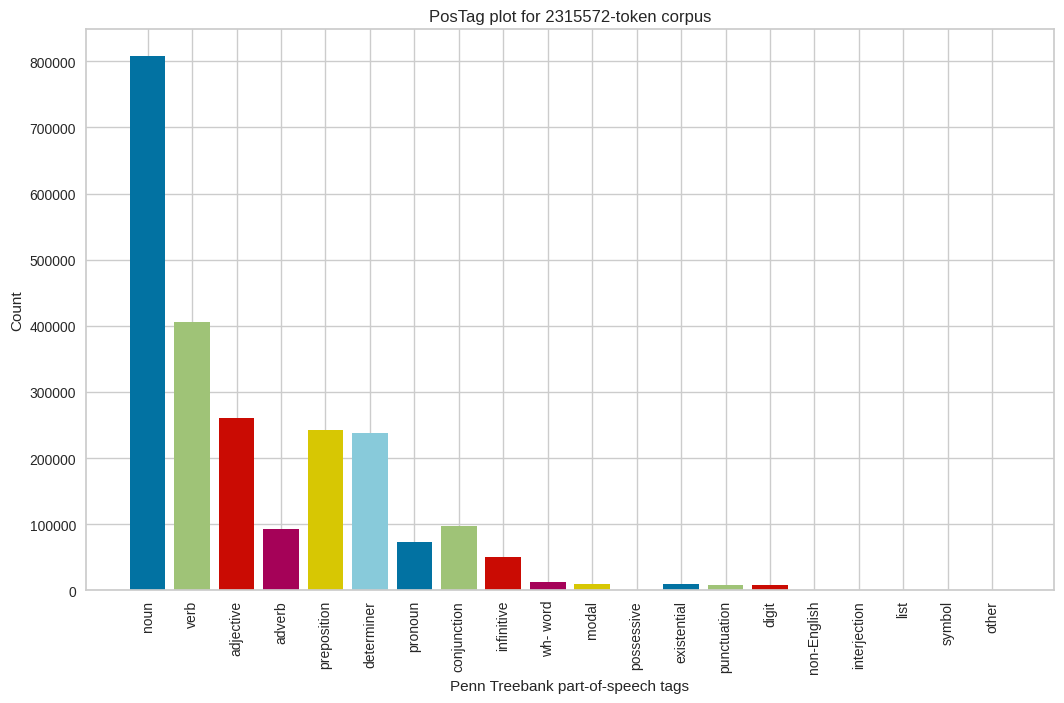

<Axes: title={'center': 'PosTag plot for 2315572-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [ ]:
viz = PosTagVisualizer(size=(1080, 720))
viz.fit(postags_plot)
viz.show()

In [ ]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

,Nouns
0,"[(SUBJECTIVE, NNP), (-year-old, NNP), (female,..."
1,"[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ..."
2,"[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL..."
3,"[(M-MODE, NNP), (Left, NNP), (enlargement, NN)..."
4,"[(left, NN), (cavity, NN), (size, NN), (wall, ..."
...,...
4994,"[(HISTORY, NN), (pleasure, NN), (meeting, NN),..."
4995,"[(ADMITTING, NN), (DIAGNOSIS, NNP), (Kawasaki,..."
4996,"[(SUBJECTIVE, NN), (female, NN), (today, NN), ..."
4997,"[(CHIEF, NNP), (COMPLAINT, NNP), (male, NN), (..."


In [ ]:

to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:


    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])

    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

,to_be_lemmatized
0,"[SUBJECTIVE, -year-old, female, presents, comp..."
1,"[PAST, MEDICAL, HISTORY, difficulty, stairs, d..."
2,"[HISTORY, OF, PRESENT, ILLNESS, ABC, today, ge..."
3,"[M-MODE, Left, enlargement, diameter, cm, Norm..."
4,"[left, cavity, size, wall, thickness, wall, mo..."
...,...
4994,"[HISTORY, pleasure, meeting, patient, today, e..."
4995,"[ADMITTING, DIAGNOSIS, Kawasaki, disease, DISC..."
4996,"[SUBJECTIVE, female, today, physical, asthma, ..."
4997,"[CHIEF, COMPLAINT, male, presents, Children, H..."


In [ ]:
#Lemmetization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()


data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [SUBJECTIVE, -year-old, female, present, compl...
1       [PAST, MEDICAL, HISTORY, difficulty, stair, di...
2       [HISTORY, OF, PRESENT, ILLNESS, ABC, today, ge...
3       [M-MODE, Left, enlargement, diameter, cm, Norm...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [HISTORY, pleasure, meeting, patient, today, e...
4995    [ADMITTING, DIAGNOSIS, Kawasaki, disease, DISC...
4996    [SUBJECTIVE, female, today, physical, asthma, ...
4997    [CHIEF, COMPLAINT, male, present, Children, Ho...
4998    [male, present, today, recommendation, Emergen...
Name: lemmatize, Length: 4999, dtype: object


In [ ]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [ ]:
data.sample(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
90,90,"Laparoscopic lysis of adhesions, attempted la...",Urology,Laparoscopic Pyeloplasty,PREOPERATIVE DIAGNOSIS Right ureteropelvic ...,"urology, retroperitoneal, fibrosis, pyeloplast...","[PREOPERATIVE, DIAGNOSIS, Right, ureteropelvic...","[(PREOPERATIVE, NNP), (DIAGNOSIS, NNP), (Right...","[(PREOPERATIVE, NNP), (DIAGNOSIS, NNP), (Right...","[PREOPERATIVE, DIAGNOSIS, Right, junction, obs...","[PREOPERATIVE, DIAGNOSIS, Right, junction, obs...",239
339,339,"Functional endoscopic sinus surgery, excision...",Surgery,Sinus Surgery - Endoscopic,PREOPERATIVE DIAGNOSES Nasopharyngeal mass R...,"surgery, nasopharyngeal tube mass, lymphoid ti...","[PREOPERATIVE, DIAGNOSES, Nasopharyngeal, mass...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Nasop...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Nasop...","[PREOPERATIVE, DIAGNOSES, Nasopharyngeal, mass...","[PREOPERATIVE, DIAGNOSES, Nasopharyngeal, mass...",216
2011,2011,Austin & Youngswick bunionectomy with Biopro ...,Orthopedic,Youngswick Bunionectomy,PREOPERATIVE DIAGNOSES Hallux rigidus left fo...,"orthopedic, hallux rigidus, metatarsal, youngs...","[PREOPERATIVE, DIAGNOSES, Hallux, rigidus, lef...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Hallu...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Hallu...","[PREOPERATIVE, DIAGNOSES, Hallux, rigidus, foo...","[PREOPERATIVE, DIAGNOSES, Hallux, rigidus, foo...",287
2802,2802,"Patient has trouble with walking and balance,...",Neurology,Neurologic Consultation - 2,REASON FOR VISIT The patient is a -year-o...,NaN,"[REASON, FOR, VISIT, The, patient, is, a, -yea...","[(REASON, NNP), (FOR, NNP), (VISIT, NNP), (The...","[(REASON, NNP), (FOR, NNP), (VISIT, NNP), (pat...","[REASON, FOR, VISIT, patient, man, consultatio...","[REASON, FOR, VISIT, patient, man, consultatio...",395
4740,4740,Mediastinal exploration and delayed primary c...,Cardiovascular / Pulmonary,Mediastinal Exploration,TITLE OF OPERATION Mediastinal exploration an...,"cardiovascular / pulmonary, mediastinal explor...","[TITLE, OF, OPERATION, Mediastinal, exploratio...","[(TITLE, NN), (OF, NNP), (OPERATION, NNP), (Me...","[(TITLE, NN), (OF, NNP), (OPERATION, NNP), (Me...","[TITLE, OF, OPERATION, Mediastinal, exploratio...","[TITLE, OF, OPERATION, Mediastinal, exploratio...",129


In [ ]:
del data['to_be_lemmatized']
del data['sample_name']

In [ ]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 22750
/ 6100
No 5745
pain 5347
A 4907
HISTORY 4829
time 4738
history 4023
procedure 3960
incision 3791
PROCEDURE 3523
room 3331
day 3328
artery 3099
area 3066
mg 2884
OF 2711
DIAGNOSIS 2654
blood 2650
skin 2640
s 2631
suture 2629
position 2616
C 2595
Dr 2551
disease 2530
tissue 2514
left 2442
fashion 2441
pressure 2433
extremity 2136
evidence 2061
mass 2051
operating 2001
Vicryl 1980
side 1970
lesion 1966
week 1955
catheter 1944
year 1927
muscle 1907
condition 1879
level 1863
surgery 1806
L 1793
wound 1720
POSTOPERATIVE 1707
PREOPERATIVE 1678
nerve 1645
rate 1645
symptom 1594
anesthesia 1588
change 1567
foot 1548
None 1520
right 1518
DIAGNOSES 1513
bone 1506
p 1505
heart 1491
risk 1450
point 1448
tube 1448
medication 1437
difficulty 1418
cm 1395
neck 1394
x 1389
head 1382
problem 1378
bladder 1354
eye 1353
X 1343
female 1339
dissection 1317
care 1316
ANESTHESIA 1308
site 1306
minute 1288
IV 1287
today 1281
treatment 1281
knee 1277
PAST 1272
General 1271
vein 1269
Left 1245
mont

In [ ]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

,tokenized_sents
0,"['SUBJECTIVE', 'This', '-year-old', 'white', '..."
1,"['PAST', 'MEDICAL', 'HISTORY', 'He', 'has', 'd..."
2,"['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'I', '..."
3,"['-D', 'M-MODE', 'Left', 'atrial', 'enlargemen..."
4,"['The', 'left', 'ventricular', 'cavity', 'size..."
...,...
4994,"['HISTORY', 'I', 'had', 'the', 'pleasure', 'of..."
4995,"['ADMITTING', 'DIAGNOSIS', 'Kawasaki', 'diseas..."
4996,"['SUBJECTIVE', 'This', 'is', 'a', '-year-old',..."
4997,"['CHIEF', 'COMPLAINT', 'This', '-year-old', 'm..."


In [ ]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,Unnamed: 0,description,medical_specialty,transcription,keywords,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1161,1161,Quad blepharoplasty for blepharochalasia and ...,Surgery,PREOPERATIVE DIAGNOSES Blepharochalasia Lowe...,"surgery, blepharochalasia, lower lid, swiss ey...","['PREOPERATIVE', 'DIAGNOSES', 'Blepharochalasi...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Bleph...","[(PREOPERATIVE, NNP), (DIAGNOSES, NNP), (Bleph...","[PREOPERATIVE, DIAGNOSES, Blepharochalasia, Lo...",92,314
1832,1832,This patient has reoccurring ingrown infected...,Podiatry,S - This patient has reoccurring ingrown infe...,"podiatry, infected toenails, onychocryptosis, ...","['S', '-', 'This', 'patient', 'has', 'reoccurr...","[(S, NNP), (-, :), (This, DT), (patient, NN), ...","[(S, NNP), (patient, NN), (toenails, NNS), (to...","[S, patient, toenail, today, care, O, examinat...",33,110
2682,2682,Leukemic meningitis. Right frontal side-inl...,Neurosurgery,TITLE OF OPERATION Right frontal side-inlet Om...,"neurosurgery, caprosyn, leukemic meningitis, o...","['TITLE', 'OF', 'OPERATION', 'Right', 'frontal...","[(TITLE, NN), (OF, NNP), (OPERATION, NNP), (Ri...","[(TITLE, NN), (OF, NNP), (OPERATION, NNP), (Ri...","[TITLE, OF, OPERATION, Right, side-inlet, Omma...",72,219
675,675,Bilateral degenerative arthritis of the knees...,Surgery,PREOPERATIVE DIAGNOSIS Bilateral degenerative ...,"surgery, degenerative, arthritis, zimmer nexge...","['PREOPERATIVE', 'DIAGNOSIS', 'Bilateral', 'de...","[(PREOPERATIVE, NNP), (DIAGNOSIS, NNP), (Bilat...","[(PREOPERATIVE, NNP), (DIAGNOSIS, NNP), (Bilat...","[PREOPERATIVE, DIAGNOSIS, Bilateral, arthritis...",470,1609
1469,1469,Abnormal electroencephalogram revealing gener...,Sleep Medicine,IMPRESSION Abnormal electroencephalogram reve...,"sleep medicine, sleep, vertex activity, muscle...","['IMPRESSION', 'Abnormal', 'electroencephalogr...","[(IMPRESSION, NNP), (Abnormal, NNP), (electroe...","[(IMPRESSION, NNP), (Abnormal, NNP), (electroe...","[IMPRESSION, Abnormal, electroencephalogram, s...",12,40


In [ ]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [ ]:
data['medical_specialty'].value_counts()

,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Radiology,273
General Medicine,259
Gastroenterology,230
Neurology,223
SOAP / Chart / Progress Notes,166


In [ ]:
data = data[(data['medical_specialty'] != ' Discharge Summary')&
            (data['medical_specialty'] != ' Office Notes') &
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,Unnamed: 0,description,medical_specialty,transcription,keywords,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,SUBJECTIVE This -year-old white female pres...,"allergy / immunology, allergic rhinitis, aller...","['SUBJECTIVE', 'This', '-year-old', 'white', '...","[(SUBJECTIVE, NNP), (This, DT), (-year-old, NN...","[(SUBJECTIVE, NNP), (-year-old, NNP), (female,...","[SUBJECTIVE, -year-old, female, present, compl...",60,209
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,PAST MEDICAL HISTORY He has difficulty climbin...,"bariatrics, laparoscopic gastric bypass, weigh...","['PAST', 'MEDICAL', 'HISTORY', 'He', 'has', 'd...","[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ...","[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ...","[PAST, MEDICAL, HISTORY, difficulty, stair, di...",151,348
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,HISTORY OF PRESENT ILLNESS I have seen ABC tod...,"bariatrics, laparoscopic gastric bypass, heart...","['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'I', '...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[HISTORY, OF, PRESENT, ILLNESS, ABC, today, ge...",237,705
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-D M-MODE Left atrial enlargement with left...,"cardiovascular / pulmonary, 2-d m-mode, dopple...","['-D', 'M-MODE', 'Left', 'atrial', 'enlargemen...","[(-D, JJ), (M-MODE, NNP), (Left, NNP), (atrial...","[(M-MODE, NNP), (Left, NNP), (enlargement, NN)...","[M-MODE, Left, enlargement, diameter, cm, Norm...",32,62
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,The left ventricular cavity size and wall thi...,"cardiovascular / pulmonary, 2-d, doppler, echo...","['The', 'left', 'ventricular', 'cavity', 'size...","[(The, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,HISTORY I had the pleasure of meeting and eva...,NaN,"['HISTORY', 'I', 'had', 'the', 'pleasure', 'of...","[(HISTORY, NN), (I, PRP), (had, VBD), (the, DT...","[(HISTORY, NN), (pleasure, NN), (meeting, NN),...","[HISTORY, pleasure, meeting, patient, today, e...",275,792
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,ADMITTING DIAGNOSIS Kawasaki disease DISCHARG...,"allergy / immunology, mucous membranes, conjun...","['ADMITTING', 'DIAGNOSIS', 'Kawasaki', 'diseas...","[(ADMITTING, NN), (DIAGNOSIS, NNP), (Kawasaki,...","[(ADMITTING, NN), (DIAGNOSIS, NNP), (Kawasaki,...","[ADMITTING, DIAGNOSIS, Kawasaki, disease, DISC...",89,263
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,SUBJECTIVE This is a -year-old white female ...,NaN,"['SUBJECTIVE', 'This', 'is', 'a', '-year-old',...","[(SUBJECTIVE, NN), (This, DT), (is, VBZ), (a, ...","[(SUBJECTIVE, NN), (female, NN), (today, NN), ...","[SUBJECTIVE, female, today, physical, asthma, ...",231,717
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,CHIEF COMPLAINT This -year-old male presents ...,NaN,"['CHIEF', 'COMPLAINT', 'This', '-year-old', 'm...","[(CHIEF, NNP), (COMPLAINT, NNP), (This, DT), (...","[(CHIEF, NNP), (COMPLAINT, NNP), (male, NN), (...","[CHIEF, COMPLAINT, male, present, Children, Ho...",167,396


In [ ]:
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

915
1


In [ ]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1103,155.538531,136.0
Consult - History and Phy.,516,208.899225,192.0
Cardiovascular / Pulmonary,372,154.943548,136.0
Orthopedic,355,189.608451,179.0
Radiology,273,109.153846,88.0
General Medicine,259,179.888031,170.0
Gastroenterology,230,122.269565,104.0
Neurology,223,178.941704,162.0
Obstetrics / Gynecology,160,152.725000,140.0


In [ ]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab,
#Bariatrics and Nutritions in Dietology,
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab,
#Bariatrics and Nutritions in Dietology,

data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].nunique()

27

In [ ]:
data['medical_specialty'].value_counts()

,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Neurologists,317
Radiology,273
General Medicine,259
Gastroenterology,230
Obstetrics / Gynecology,160


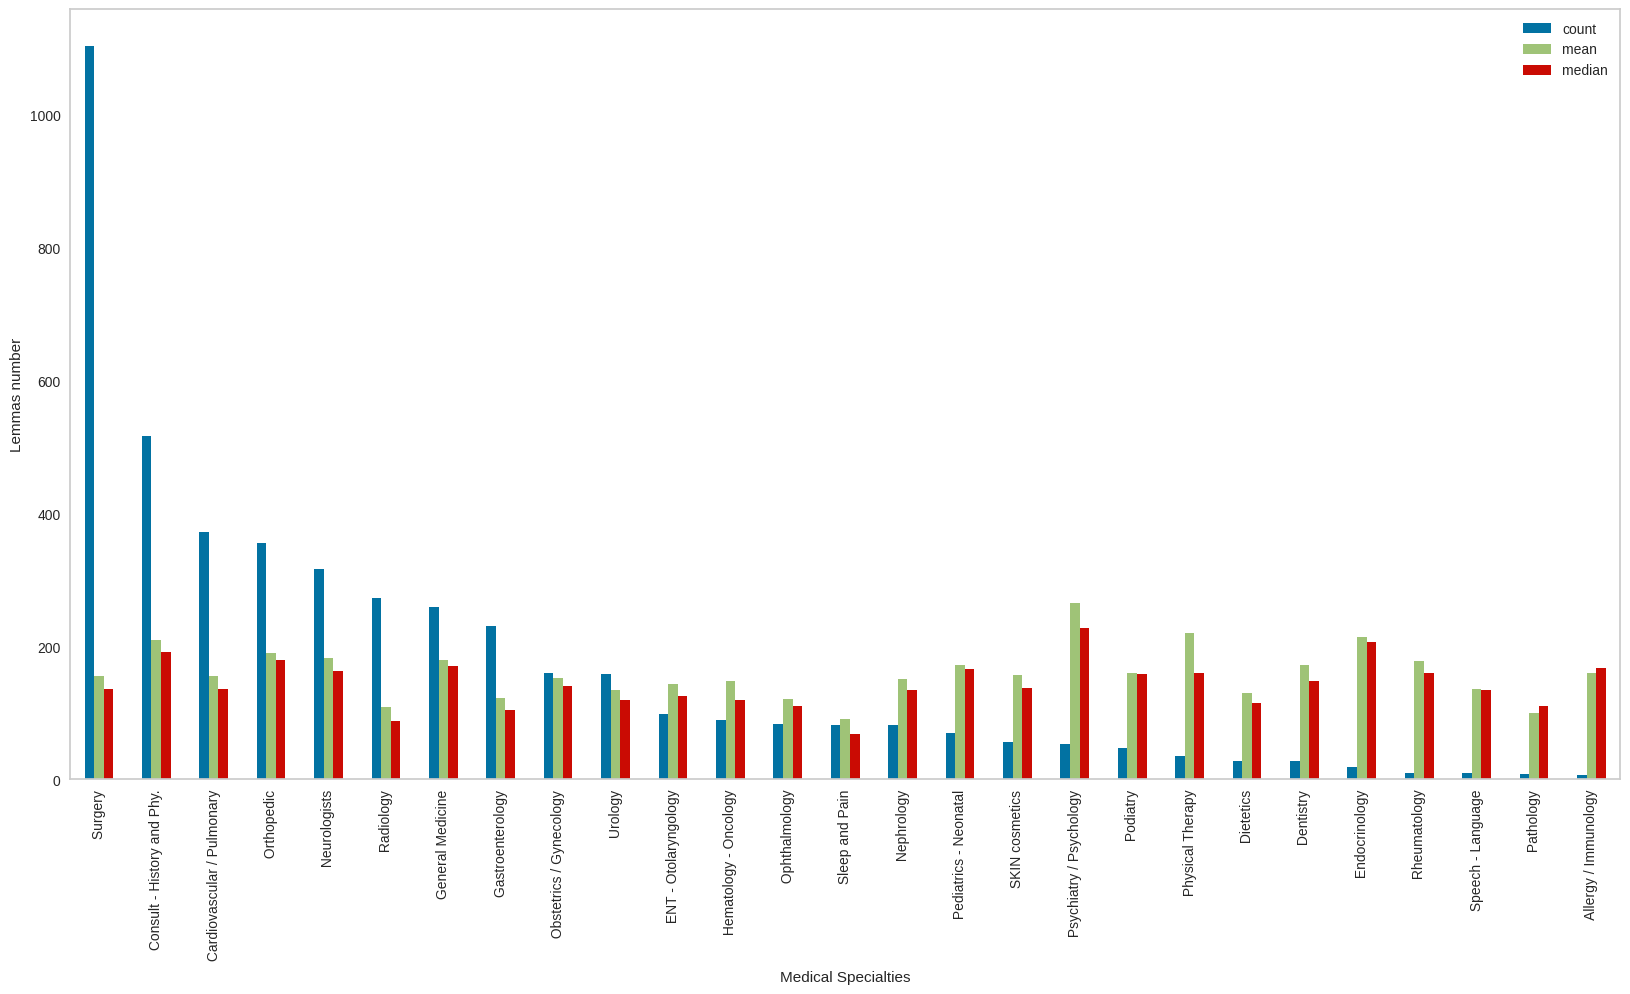

In [ ]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.show()

In [ ]:
import networkx as nx
import plotly.graph_objs as go
import random

# Sample data: replace these with your actual entities and relations.
# For example, 'edges' might be a list of tuples: (source, target, relation, weight)
edges = [
    ("Hypertension", "ACE Inhibitors", "treats", 5),
    ("Diabetes", "Insulin", "treats", 3),
    ("Diabetes", "Metformin", "treats", 4),
    ("Hypertension", "Beta Blockers", "treats", 4),
    ("Hypertension", "Stroke", "complicates", 2),
    ("Diabetes", "Neuropathy", "complicates", 3),
    ("Stroke", "Rehabilitation", "leads_to", 2),
    ("Obesity", "Diabetes", "risk_factor", 3),
    ("Obesity", "Hypertension", "risk_factor", 3),
]

# Create a directed graph (or use nx.Graph() for undirected)
G = nx.DiGraph()

# Add nodes and edges to the graph
for src, dst, relation, weight in edges:
    G.add_node(src)
    G.add_node(dst)
    G.add_edge(src, dst, relation=relation, weight=weight)

# Define a color palette (or generate random colors)
def get_random_color():
    return "rgb({}, {}, {})".format(random.randint(50, 255), random.randint(50, 255), random.randint(50, 255))

node_colors = {node: get_random_color() for node in G.nodes()}

# Compute layout for visualization (spring layout)
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Create edge traces
edge_traces = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    relation = edge[2]['relation']
    weight = edge[2]['weight']

    # Thicker line for higher weight; you can modify scaling factor as needed.
    line_width = weight * 1.5

    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=line_width, color='#888'),
        hoverinfo='text',
        text=f"{edge[0]} {relation} {edge[1]} (weight: {weight})",
        mode='lines')
    edge_traces.append(edge_trace)

# Create node trace
node_x = []
node_y = []
node_text = []
node_color_list = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color_list.append(node_colors[node])

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        color=node_color_list,
        size=20,
        line=dict(width=2, color='DarkSlateGrey')
    )
)

# Combine traces into a figure
fig = go.Figure(data=edge_traces + [node_trace],
                layout=go.Layout(
                    title='<b>Clinical Knowledge Graph</b>',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Interactive graph showing relationships between medical entities",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
               )

fig.show()



'#1import networkx as nx\nimport plotly.graph_objs as go\nimport random\n\n# Sample data: replace these with your actual entities and relations.\n# For example, \'edges\' might be a list of tuples: (source, target, relation, weight)\nedges = [\n    ("Hypertension", "ACE Inhibitors", "treats", 5),\n    ("Diabetes", "Insulin", "treats", 3),\n    ("Diabetes", "Metformin", "treats", 4),\n    ("Hypertension", "Beta Blockers", "treats", 4),\n    ("Hypertension", "Stroke", "complicates", 2),\n    ("Diabetes", "Neuropathy", "complicates", 3),\n    ("Stroke", "Rehabilitation", "leads_to", 2),\n    ("Obesity", "Diabetes", "risk_factor", 3),\n    ("Obesity", "Hypertension", "risk_factor", 3),\n]\n\n# Create a directed graph (or use nx.Graph() for undirected)\nG = nx.DiGraph()\n\n# Add nodes and edges to the graph\nfor src, dst, relation, weight in edges:\n    G.add_node(src)\n    G.add_node(dst)\n    G.add_edge(src, dst, relation=relation, weight=weight)\n\n# Define a color palette (or generate r

In [ ]:
2import networkx as nx
import matplotlib.pyplot as plt

# Create a knowledge graph using NetworkX
knowledge_graph = nx.Graph()

# Add nodes for medical specialties
for specialty in data['medical_specialty'].unique():
    knowledge_graph.add_node(specialty, node_type='specialty')

# Add nodes for frequent lemmas
for lemma, count in dictionary.items():
    if count >= 10: # adjust this threshold as needed
        knowledge_graph.add_node(lemma, node_type='lemma', count=count)

# Add edges between specialties and frequent lemmas based on co-occurrence
# (This is a simplified example; a more sophisticated method may be required)
for index, row in data.iterrows():
    specialty = row['medical_specialty']
    for lemma in row['lemmatize']:
        if lemma in dictionary and dictionary[lemma] >= 10:
            if knowledge_graph.has_edge(specialty, lemma):
              knowledge_graph[specialty][lemma]['weight'] +=1
            else:
              knowledge_graph.add_edge(specialty, lemma, weight=1)

# Visualize the knowledge graph
pos = nx.spring_layout(knowledge_graph, k=0.25, iterations=50) #adjust k and iterations
plt.figure(figsize=(15, 10))
nx.draw(knowledge_graph, pos, with_labels=True, node_size=1000, font_size=8, node_color="skyblue", font_color="black", edge_color="gray", width=0.5)
plt.title("Medical Specialty - Lemma Knowledge Graph")
plt.show()


'#2import networkx as nx\nimport matplotlib.pyplot as plt\n\n# Create a knowledge graph using NetworkX\nknowledge_graph = nx.Graph()\n\n# Add nodes for medical specialties\nfor specialty in data[\'medical_specialty\'].unique():\n    knowledge_graph.add_node(specialty, node_type=\'specialty\')\n\n# Add nodes for frequent lemmas\nfor lemma, count in dictionary.items():\n    if count >= 10: # adjust this threshold as needed\n        knowledge_graph.add_node(lemma, node_type=\'lemma\', count=count)\n\n# Add edges between specialties and frequent lemmas based on co-occurrence\n# (This is a simplified example; a more sophisticated method may be required)\nfor index, row in data.iterrows():\n    specialty = row[\'medical_specialty\']\n    for lemma in row[\'lemmatize\']:\n        if lemma in dictionary and dictionary[lemma] >= 10:\n            if knowledge_graph.has_edge(specialty, lemma):\n              knowledge_graph[specialty][lemma][\'weight\'] +=1\n            else:\n              knowl

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import random
import seaborn as sns

def create_enhanced_knowledge_graph(data, dictionary, min_count=20, min_edge_weight=3):
    """
    Creates an enhanced knowledge graph connecting medical specialties to frequent lemmas.

    Parameters:
    data (DataFrame): DataFrame containing medical specialty and lemmatized text data
    dictionary (Counter): Counter object with lemma frequencies
    min_count (int): Minimum count threshold for including lemmas
    min_edge_weight (int): Minimum weight threshold for including edges
    """
    # Create a knowledge graph using NetworkX
    knowledge_graph = nx.Graph()

    # Get top lemmas
    top_lemmas = {lemma: count for lemma, count in dictionary.items() if count >= min_count}

    # Create a mapping of specialty to lemma frequency
    specialty_lemma_freq = {}
    for specialty in data['medical_specialty'].unique():
        specialty_lemma_freq[specialty] = {}

    # Calculate frequency of lemmas for each specialty
    for index, row in data.iterrows():
        specialty = row['medical_specialty']
        for lemma in row['lemmatize']:
            if lemma in top_lemmas:
                if lemma not in specialty_lemma_freq[specialty]:
                    specialty_lemma_freq[specialty][lemma] = 0
                specialty_lemma_freq[specialty][lemma] += 1

    # Add nodes for medical specialties
    for specialty in data['medical_specialty'].unique():
        knowledge_graph.add_node(specialty, node_type='specialty')

    # Add nodes for frequent lemmas
    for lemma, count in top_lemmas.items():
        knowledge_graph.add_node(lemma, node_type='lemma', count=count)

    # Add edges between specialties and frequent lemmas based on co-occurrence
    for specialty in specialty_lemma_freq:
        for lemma, freq in specialty_lemma_freq[specialty].items():
            if freq >= min_edge_weight:
                knowledge_graph.add_edge(specialty, lemma, weight=freq)

    # Filter out disconnected nodes
    knowledge_graph = nx.Graph(knowledge_graph.subgraph(max(nx.connected_components(knowledge_graph), key=len)))

    return knowledge_graph, specialty_lemma_freq

def visualize_enhanced_knowledge_graph(knowledge_graph, specialty_lemma_freq):
    """
    Creates a colorful and attractive visualization of the knowledge graph.
    """
    plt.figure(figsize=(22, 16))

    # Use a deterministic layout for better visualization
    pos = nx.spring_layout(knowledge_graph, k=0.5, seed=42)

    # Get node types
    node_types = nx.get_node_attributes(knowledge_graph, 'node_type')

    # Create color palettes
    specialty_palette = sns.color_palette("husl", len([n for n in knowledge_graph.nodes() if node_types.get(n) == 'specialty']))
    lemma_palette = sns.color_palette("viridis", len([n for n in knowledge_graph.nodes() if node_types.get(n) == 'lemma']))

    # Assign colors to nodes
    specialty_colors = {}
    lemma_colors = {}

    specialty_idx = 0
    lemma_idx = 0

    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            specialty_colors[node] = specialty_palette[specialty_idx]
            specialty_idx += 1
        else:
            lemma_colors[node] = lemma_palette[lemma_idx]
            lemma_idx += 1

    # Assign node colors
    node_colors = []
    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            node_colors.append(specialty_colors[node])
        else:
            node_colors.append(lemma_colors[node])

    # Calculate node sizes
    node_sizes = []
    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            degree = knowledge_graph.degree(node)
            node_sizes.append(degree * 100 + 1000)  # Base size + degree dependent size
        else:
            count = knowledge_graph.nodes[node].get('count', 10)
            node_sizes.append(count * 20 + 200)  # Size based on lemma count

    # Calculate edge widths and colors
    edge_widths = []
    edge_colors = []
    edge_weights = []

    for u, v, data in knowledge_graph.edges(data=True):
        weight = data.get('weight', 1)
        edge_weights.append(weight)

    # Normalize edge weights for coloring
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    norm = Normalize(vmin=min_weight, vmax=max_weight)

    for u, v, data in knowledge_graph.edges(data=True):
        weight = data.get('weight', 1)
        # Width based on weight
        edge_widths.append(weight / max_weight * 5 + 0.5)
        # Color based on weight
        edge_colors.append(plt.cm.plasma(norm(weight)))

    # Draw the graph
    # 1. Draw edges
    nx.draw_networkx_edges(
        knowledge_graph, pos,
        width=edge_widths,
        edge_color=edge_colors,
        alpha=0.7
    )

    # 2. Draw nodes
    nx.draw_networkx_nodes(
        knowledge_graph, pos,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.8,
        edgecolors='black',
        linewidths=0.5
    )

    # 3. Draw labels with different sizes for specialties and lemmas
    specialty_labels = {node: node for node in knowledge_graph.nodes() if node_types.get(node) == 'specialty'}
    lemma_labels = {node: node for node in knowledge_graph.nodes() if node_types.get(node) == 'lemma'}

    nx.draw_networkx_labels(
        knowledge_graph, pos,
        labels=specialty_labels,
        font_size=12,
        font_weight='bold',
        font_color='black'
    )

    nx.draw_networkx_labels(
        knowledge_graph, pos,
        labels=lemma_labels,
        font_size=8,
        font_color='black'
    )

    # Add a colorbar for edge weights
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Edge Weight (Co-occurrence Frequency)', shrink=0.7)

    # Add a title and adjust the plot
    plt.title("Medical Specialty - Lemma Knowledge Graph", fontsize=20, fontweight='bold')
    plt.axis('off')

    # Add a legend
    specialty_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=specialty_palette[0], markersize=15, label='Medical Specialty')
    lemma_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lemma_palette[0], markersize=15, label='Medical Term')
    plt.legend(handles=[specialty_patch, lemma_patch], loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.savefig('enhanced_medical_knowledge_graph.png', dpi=300, bbox_inches='tight')
    plt.show()

# Now use the functions with your existing data
# First, create the knowledge graph
knowledge_graph, specialty_lemma_freq = create_enhanced_knowledge_graph(data, dictionary, min_count=20, min_edge_weight=3)

# Then visualize it
visualize_enhanced_knowledge_graph(knowledge_graph, specialty_lemma_freq)

# Additional visualization: Create a specialized view for top 5 specialties
def create_specialty_focused_graph(data, dictionary, top_specialties=5, min_count=15, min_edge_weight=2):
    """
    Creates a knowledge graph focused on the top specialties.
    """
    # Get top specialties by count
    specialty_counts = data['medical_specialty'].value_counts()
    top_specialty_names = specialty_counts.head(top_specialties).index.tolist()

    # Filter data for top specialties
    filtered_data = data[data['medical_specialty'].isin(top_specialty_names)]

    # Create a knowledge graph
    knowledge_graph, specialty_lemma_freq = create_enhanced_knowledge_graph(filtered_data, dictionary, min_count, min_edge_weight)

    return knowledge_graph, specialty_lemma_freq

# Create and visualize the specialty-focused graph
specialty_graph, specialty_freq = create_specialty_focused_graph(data, dictionary)
visualize_enhanced_knowledge_graph(specialty_graph, specialty_freq)

# Create a 3D visualization (requires matplotlib 3.1+)
def visualize_3d_knowledge_graph(knowledge_graph, specialty_lemma_freq):
    """
    Creates a 3D visualization of the knowledge graph.
    """
    from mpl_toolkits.mplot3d import Axes3D

    # Create figure and 3D axis
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(111, projection='3d')

    # 3D layout
    pos_3d = nx.spring_layout(knowledge_graph, dim=3, seed=42)

    # Extract node positions
    node_xyz = np.array([pos_3d[v] for v in knowledge_graph.nodes()])

    # Get node types
    node_types = nx.get_node_attributes(knowledge_graph, 'node_type')

    # Create color palettes
    specialty_palette = sns.color_palette("husl", len([n for n in knowledge_graph.nodes() if node_types.get(n) == 'specialty']))
    lemma_palette = sns.color_palette("viridis", len([n for n in knowledge_graph.nodes() if node_types.get(n) == 'lemma']))

    # Assign colors to nodes
    node_colors = []
    specialty_idx = 0
    lemma_idx = 0

    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            node_colors.append(specialty_palette[specialty_idx])
            specialty_idx += 1
        else:
            node_colors.append(lemma_palette[lemma_idx])
            lemma_idx += 1

    # Calculate node sizes
    node_sizes = []
    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            degree = knowledge_graph.degree(node)
            node_sizes.append(degree * 100 + 300)
        else:
            count = knowledge_graph.nodes[node].get('count', 10)
            node_sizes.append(count * 10 + 100)

    # Draw nodes
    ax.scatter(
        node_xyz[:,0], node_xyz[:,1], node_xyz[:,2],
        c=node_colors,
        s=node_sizes,
        edgecolors='k',
        alpha=0.7
    )

    # Draw edges
    for u, v, data in knowledge_graph.edges(data=True):
        weight = data.get('weight', 1)
        x = np.array((pos_3d[u][0], pos_3d[v][0]))
        y = np.array((pos_3d[u][1], pos_3d[v][1]))
        z = np.array((pos_3d[u][2], pos_3d[v][2]))

        # Line thickness based on weight
        line_width = weight / 10 + 0.5

        # Color based on weight
        color = plt.cm.plasma(weight / 20)

        # Draw the line
        ax.plot(x, y, z, c=color, alpha=0.5, linewidth=line_width)

    # Add labels for specialty nodes only (to avoid clutter)
    for node in knowledge_graph.nodes():
        if node_types.get(node) == 'specialty':
            x, y, z = pos_3d[node]
            ax.text(x, y, z, node, fontsize=10, fontweight='bold')

    # Set title and adjust view
    ax.set_title("3D Medical Knowledge Graph", fontsize=20, fontweight='bold')
    ax.set_axis_off()

    plt.tight_layout()
    plt.savefig('medical_knowledge_graph_3d.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create and visualize the 3D graph
try:
    visualize_3d_knowledge_graph(knowledge_graph, specialty_lemma_freq)
except Exception as e:
    print(f"Could not create 3D visualization: {e}")
    print("3D visualization requires matplotlib 3.1+ and may not work in all environments.")

IndentationError: unexpected indent (<ipython-input-40-1f7855392150>, line 11)

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

class MedInsightIntegration:
    """
    Class to integrate NLP knowledge graph with Ascle medical language model capabilities
    """
    def __init__(self, data, knowledge_graph=None):
        self.data = data
        self.knowledge_graph = knowledge_graph

        # Initialize the Ascle-based model (using clinical BERT as placeholder)
        # In production, this would be replaced with the actual Ascle model
        print("Loading medical language model...")
        self.tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
        self.model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
        print("Model loaded successfully")

        # Store embeddings
        self.specialty_embeddings = {}
        self.term_embeddings = {}
        self.document_embeddings = {}

    def generate_text_embedding(self, text):
        """Generate embeddings for a given text using the medical language model"""
        inputs = self.tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        with torch.no_grad():
            outputs = self.model(**inputs)

        # Use CLS token embedding as the text representation
        return outputs.last_hidden_state[:, 0, :].numpy().flatten()

    def compute_document_embeddings(self, sample_size=None):
        """Compute embeddings for all documents or a sample"""
        if sample_size:
            documents = self.data.sample(sample_size)
        else:
            documents = self.data

        print(f"Computing embeddings for {len(documents)} documents...")

        for idx, row in documents.iterrows():
            text = row['transcription']
            specialty = row['medical_specialty']

            # Generate embedding
            embedding = self.generate_text_embedding(text)
            self.document_embeddings[idx] = {
                'embedding': embedding,
                'specialty': specialty
            }

            # Store specialty embedding by averaging all documents of that specialty
            if specialty not in self.specialty_embeddings:
                self.specialty_embeddings[specialty] = []

            self.specialty_embeddings[specialty].append(embedding)

        # Average the embeddings for each specialty
        for specialty, embeddings in self.specialty_embeddings.items():
            self.specialty_embeddings[specialty] = np.mean(embeddings, axis=0)

        print("Document embeddings computed successfully")

    def compute_term_embeddings(self, lemma_list):
        """Compute embeddings for medical terms/lemmas"""
        print(f"Computing embeddings for {len(lemma_list)} medical terms...")

        for lemma in lemma_list:
            self.term_embeddings[lemma] = self.generate_text_embedding(lemma)

        print("Term embeddings computed successfully")

    def find_similar_documents(self, query_text, top_n=5):
        """Find documents similar to the query text"""
        query_embedding = self.generate_text_embedding(query_text)

        similarities = {}
        for doc_id, doc_data in self.document_embeddings.items():
            doc_embedding = doc_data['embedding']
            # Compute cosine similarity
            similarity = np.dot(query_embedding, doc_embedding) / (
                np.linalg.norm(query_embedding) * np.linalg.norm(doc_embedding)
            )
            similarities[doc_id] = similarity

        # Get top N similar documents
        top_docs = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

        results = []
        for doc_id, similarity in top_docs:
            results.append({
                'document_id': doc_id,
                'similarity': similarity,
                'specialty': self.document_embeddings[doc_id]['specialty'],
                'text': self.data.loc[doc_id]['transcription'][:200] + "..." # Preview
            })

        return results

    def enhance_knowledge_graph(self):
        """Enhance the knowledge graph with semantic relationships from embeddings"""
        if not self.knowledge_graph:
            print("Knowledge graph not provided. Creating a new one...")
            self.knowledge_graph = nx.Graph()

        # Add semantic edges between specialties based on embedding similarity
        specialties = list(self.specialty_embeddings.keys())

        for i, spec1 in enumerate(specialties):
            for spec2 in specialties[i+1:]:
                emb1 = self.specialty_embeddings[spec1]
                emb2 = self.specialty_embeddings[spec2]

                # Compute cosine similarity
                similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

                # Add edge if similarity is above threshold
                if similarity > 0.7:  # Adjust threshold as needed
                    if not self.knowledge_graph.has_node(spec1):
                        self.knowledge_graph.add_node(spec1, node_type='specialty')
                    if not self.knowledge_graph.has_node(spec2):
                        self.knowledge_graph.add_node(spec2, node_type='specialty')

                    self.knowledge_graph.add_edge(spec1, spec2, weight=similarity, edge_type='semantic')

        return self.knowledge_graph

    def extract_key_medical_concepts(self, text, top_n=10):
        """Extract key medical concepts from text using the language model"""
        # This is a simplified implementation
        # In production, this would use the full capabilities of Ascle

        # Tokenize and get embeddings
        inputs = self.tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        with torch.no_grad():
            outputs = self.model(**inputs)

        # Get word embeddings (last hidden state)
        word_embeddings = outputs.last_hidden_state[0].numpy()

        # Get tokens
        tokens = self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

        # Calculate token importance (using norm of embedding as a simple proxy)
        token_importance = np.linalg.norm(word_embeddings, axis=1)

        # Create token-importance pairs, excluding special tokens
        token_scores = []
        for i, token in enumerate(tokens):
            if token.startswith('##'):
                continue
            if token in ['[CLS]', '[SEP]', '[PAD]']:
                continue
            token_scores.append((token, token_importance[i]))

        # Sort by importance and get top N
        token_scores.sort(key=lambda x: x[1], reverse=True)

        return token_scores[:top_n]

    def generate_clinical_summary(self, text):
        """Generate a clinical summary for the given text"""
        # In a real implementation, this would use Ascle's generation capabilities
        # Here we're providing a simplified version that extracts key concepts

        # Extract key concepts
        key_concepts = self.extract_key_medical_concepts(text, top_n=15)

        # Find most similar documents
        similar_docs = self.find_similar_documents(text, top_n=3)

        # Prepare summary information
        summary = {
            'key_concepts': [concept for concept, _ in key_concepts],
            'probable_specialties': [doc['specialty'] for doc in similar_docs],
            'similar_document_ids': [doc['document_id'] for doc in similar_docs]
        }

        return summary

    def visualize_enhanced_graph(self):
        """Visualize the enhanced knowledge graph with semantic relationships"""
        if not self.knowledge_graph:
            print("Knowledge graph not available. Call enhance_knowledge_graph() first.")
            return

        plt.figure(figsize=(20, 16))

        # Use a deterministic layout for better visualization
        pos = nx.spring_layout(self.knowledge_graph, k=0.5, seed=42)

        # Get edge types
        edge_types = nx.get_edge_attributes(self.knowledge_graph, 'edge_type')

        # Create different edge lists based on type
        semantic_edges = [(u, v) for u, v in self.knowledge_graph.edges() if edge_types.get((u, v)) == 'semantic']
        co_occurrence_edges = [(u, v) for u, v in self.knowledge_graph.edges() if edge_types.get((u, v)) != 'semantic']

        # Node attributes
        node_types = nx.get_node_attributes(self.knowledge_graph, 'node_type')

        # Create colors for nodes
        specialty_nodes = [n for n in self.knowledge_graph.nodes() if node_types.get(n) == 'specialty']
        lemma_nodes = [n for n in self.knowledge_graph.nodes() if node_types.get(n) != 'specialty']

        # Draw the graph
        # 1. Draw different edge types
        nx.draw_networkx_edges(
            self.knowledge_graph, pos,
            edgelist=semantic_edges,
            edge_color='red',
            width=2.0,
            alpha=0.7,
            style='dashed'
        )

        nx.draw_networkx_edges(
            self.knowledge_graph, pos,
            edgelist=co_occurrence_edges,
            edge_color='blue',
            width=1.0,
            alpha=0.5
        )

        # 2. Draw nodes
        nx.draw_networkx_nodes(
            self.knowledge_graph, pos,
            nodelist=specialty_nodes,
            node_color='gold',
            node_size=800,
            alpha=0.8
        )

        nx.draw_networkx_nodes(
            self.knowledge_graph, pos,
            nodelist=lemma_nodes,
            node_color='skyblue',
            node_size=400,
            alpha=0.6
        )

        # 3. Draw labels
        nx.draw_networkx_labels(
            self.knowledge_graph, pos,
            font_size=10,
            font_weight='bold'
        )

        # Create legend
        semantic_patch = plt.Line2D([0], [0], color='red', linestyle='dashed', label='Semantic Similarity')
        co_occurrence_patch = plt.Line2D([0], [0], color='blue', label='Co-occurrence')
        specialty_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=15, label='Medical Specialty')
        lemma_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Medical Term')

        plt.legend(handles=[semantic_patch, co_occurrence_patch, specialty_patch, lemma_patch], loc='upper right')

        plt.title("Enhanced Medical Knowledge Graph with Semantic Relationships", fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('enhanced_semantic_knowledge_graph.png', dpi=300, bbox_inches='tight')
        plt.show()


# Example usage
def main():
    """Main function to demonstrate the integration"""
    # Assuming data is loaded and preprocessed
    # Assuming knowledge_graph is the graph from the previous code

    # For demonstration purposes
    print("Initializing MedInsight integration...")
    integration = MedInsightIntegration(data, knowledge_graph)

    # Compute embeddings (use a small sample for demonstration)
    print("Computing document embeddings (sample)...")
    integration.compute_document_embeddings(sample_size=50)

    # Get top lemmas from our dictionary
    top_lemmas = [k for k, v in sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:100]]
    integration.compute_term_embeddings(top_lemmas)

    # Enhance the knowledge graph with semantic relationships
    print("Enhancing knowledge graph with semantic relationships...")
    enhanced_graph = integration.enhance_knowledge_graph()

    # Visualize the enhanced graph
    print("Visualizing enhanced knowledge graph...")
    integration.visualize_enhanced_graph()

    # Example of clinical note analysis
    print("\nAnalyzing sample clinical note...")
    sample_idx = data.index[15]  # Get a sample note
    sample_text = data.loc[sample_idx]['transcription']

    # Extract key medical concepts
    key_concepts = integration.extract_key_medical_concepts(sample_text[:1000])  # Using first 1000 chars for speed
    print("\nKey medical concepts:")
    for concept, score in key_concepts:
        print(f"- {concept}: {score:.4f}")

    # Generate clinical summary
    summary = integration.generate_clinical_summary(sample_text[:1000])
    print("\nClinical Summary:")
    print(f"Key concepts: {', '.join(summary['key_concepts'][:5])}")
    print(f"Probable specialties: {', '.join(summary['probable_specialties'])}")

    # Find similar documents
    print("\nFinding similar documents...")
    similar_docs = integration.find_similar_documents(sample_text[:1000], top_n=3)
    print("Similar documents:")
    for i, doc in enumerate(similar_docs):
        print(f"{i+1}. Document ID: {doc['document_id']}, Similarity: {doc['similarity']:.4f}")
        print(f"   Specialty: {doc['specialty']}")
        print(f"   Preview: {doc['text']}\n")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error in main function: {e}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading medical language model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model loaded successfully
Computing embeddings for 5 documents...
Document embeddings computed successfully
Computing embeddings for 5 medical terms...
Term embeddings computed successfully
Knowledge graph not provided. Creating a new one...


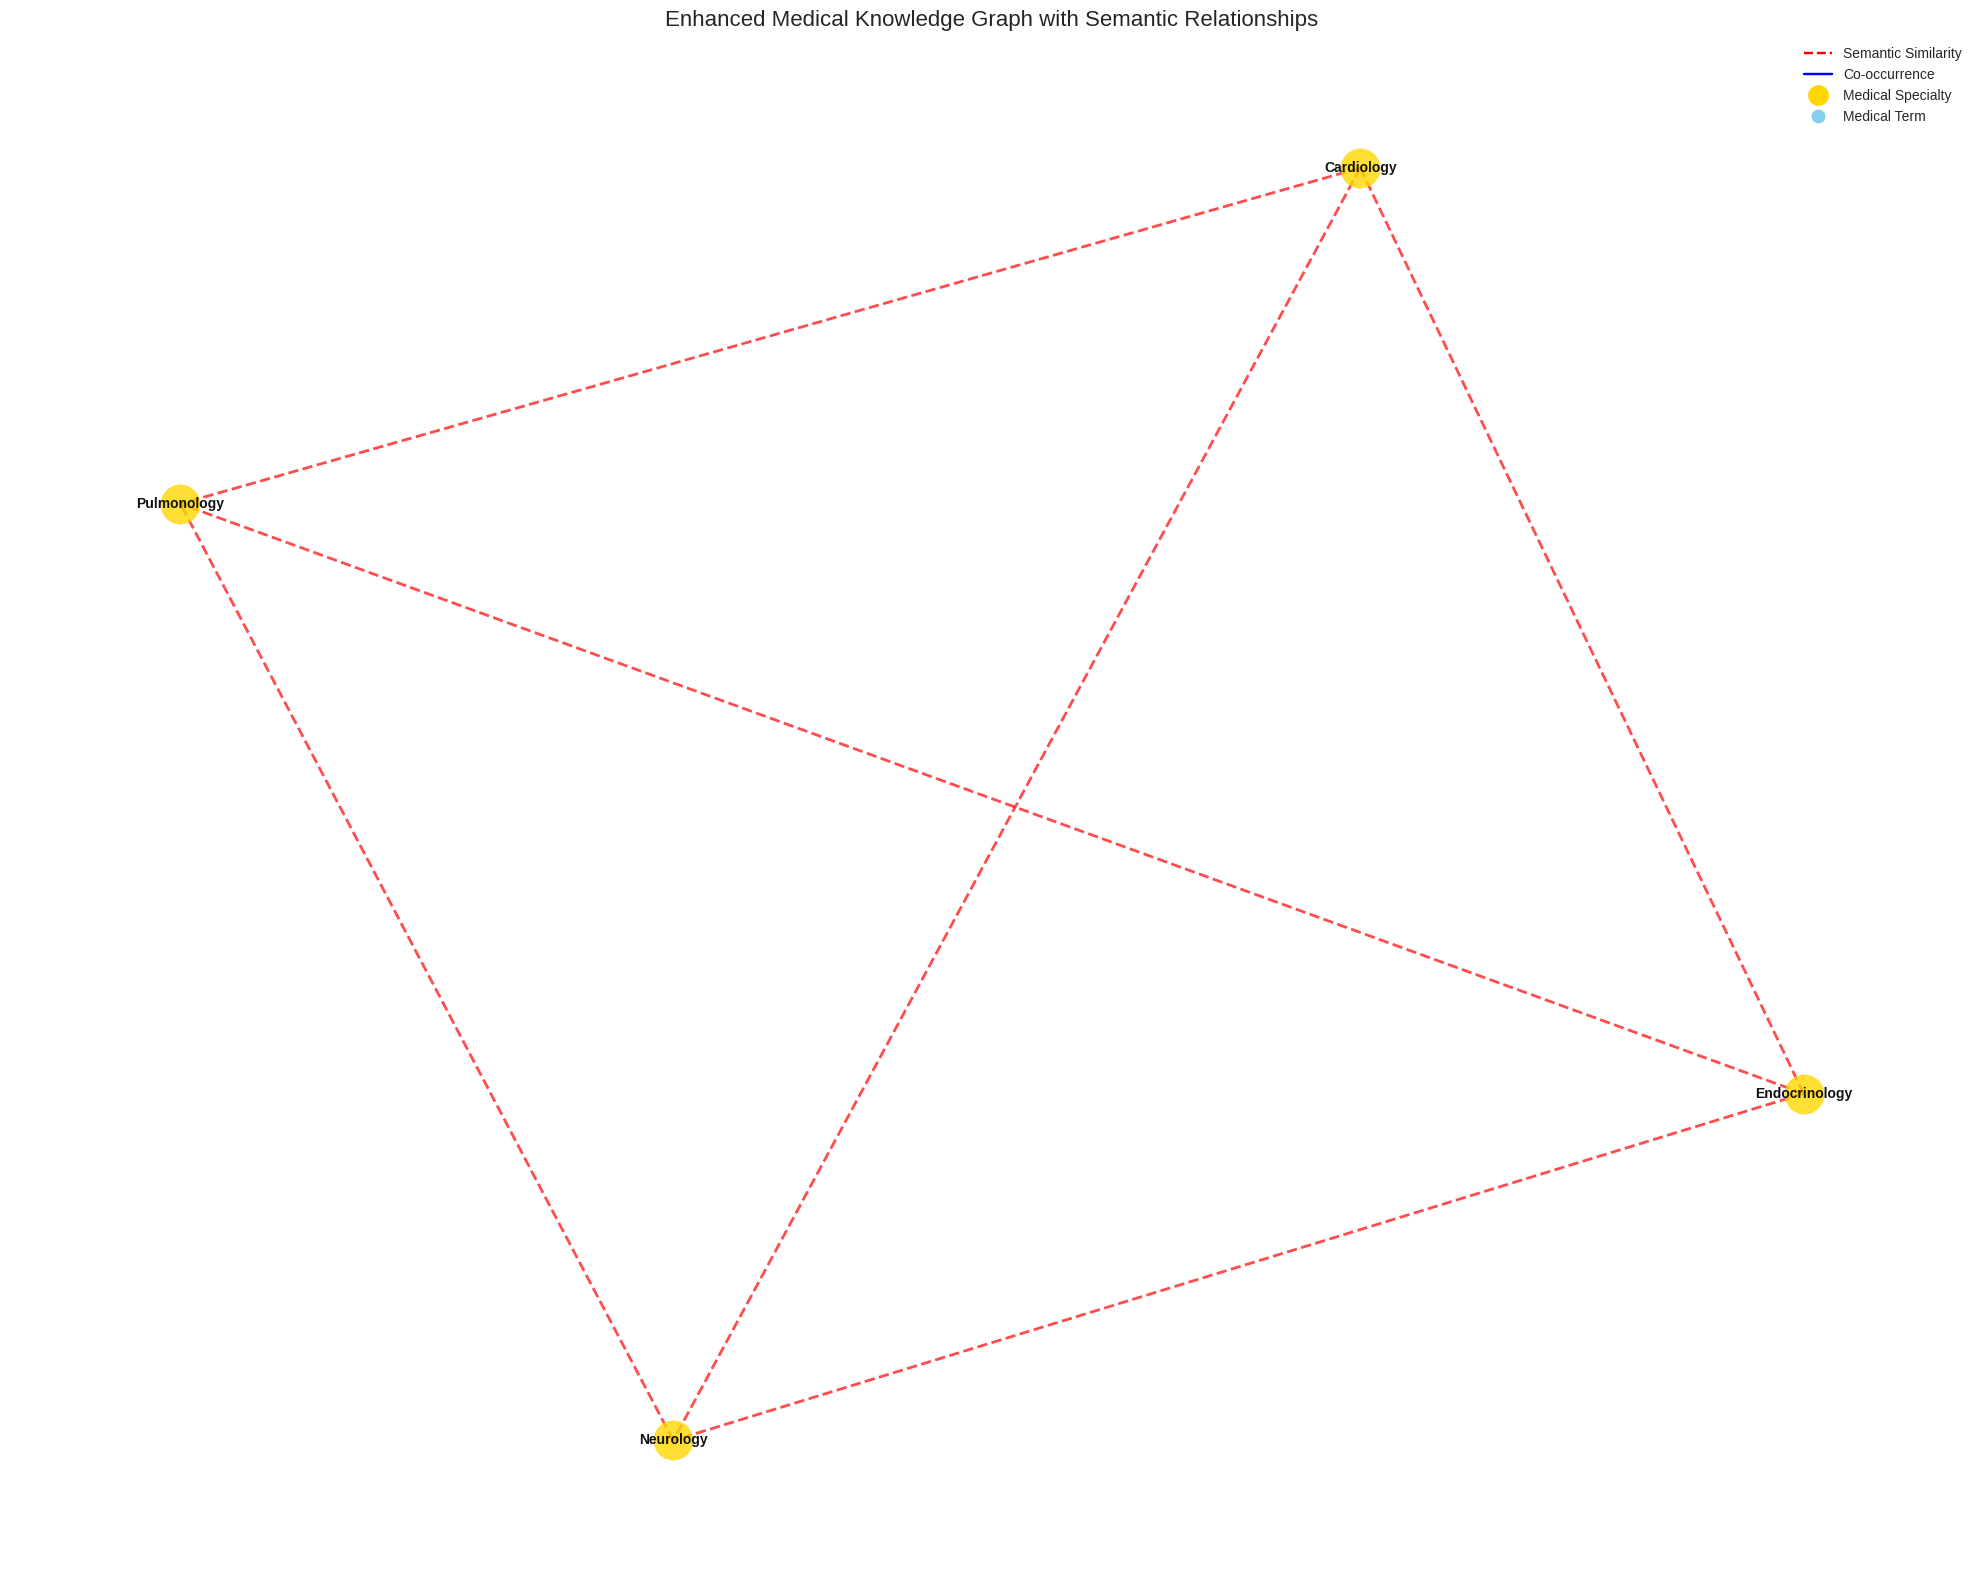


--- Sample Clinical Note Analysis ---
Transcription: Patient reports chest pain and shortness of breath. History of hypertension.

Extracted Key Medical Concepts:
of: 16.4580
short: 16.0702
breath: 15.4944
and: 15.2045
chest: 14.9233

Generated Clinical Summary:
Key Concepts: ['of', 'short', 'breath', 'and', 'chest', 'of', 'pain', 'h', 'reports', 'patient', 'history', '.', '.']
Probable Specialties: ['Cardiology', 'Neurology', 'Cardiology']
Similar Document IDs: [0, 3, 2]

Similar Documents:
Document ID: 0, Similarity: 1.0000
Specialty: Cardiology
Preview: Patient reports chest pain and shortness of breath. History of hypertension....

Document ID: 3, Similarity: 0.8950
Specialty: Neurology
Preview: Patient shows symptoms of migraine and occasional dizziness....

Document ID: 2, Similarity: 0.8549
Specialty: Cardiology
Preview: There is a history of surgery for heart disease, currently on beta blockers....



In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK packages if not already installed
nltk.download('punkt')

# Sample MedInsightIntegration class (as defined previously)
class MedInsightIntegration:
    """
    Class to integrate NLP knowledge graph with Ascle medical language model capabilities.
    """
    def __init__(self, data, knowledge_graph=None):
        self.data = data
        self.knowledge_graph = knowledge_graph

        # Initialize the Ascle-based model (using ClinicalBERT as a placeholder)
        print("Loading medical language model...")
        self.tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
        self.model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
        print("Model loaded successfully")

        # Store embeddings
        self.specialty_embeddings = {}
        self.term_embeddings = {}
        self.document_embeddings = {}

    def generate_text_embedding(self, text):
        """Generate embeddings for a given text using the medical language model"""
        inputs = self.tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        with torch.no_grad():
            outputs = self.model(**inputs)
        # Use CLS token embedding as the text representation
        return outputs.last_hidden_state[:, 0, :].numpy().flatten()

    def compute_document_embeddings(self, sample_size=None):
        """Compute embeddings for all documents or a sample"""
        if sample_size:
            documents = self.data.sample(sample_size, random_state=42)
        else:
            documents = self.data

        print(f"Computing embeddings for {len(documents)} documents...")

        for idx, row in documents.iterrows():
            text = row['transcription']
            specialty = row['medical_specialty']
            embedding = self.generate_text_embedding(text)
            self.document_embeddings[idx] = {
                'embedding': embedding,
                'specialty': specialty
            }
            if specialty not in self.specialty_embeddings:
                self.specialty_embeddings[specialty] = []
            self.specialty_embeddings[specialty].append(embedding)

        # Average embeddings for each specialty
        for specialty, embeddings in self.specialty_embeddings.items():
            self.specialty_embeddings[specialty] = np.mean(embeddings, axis=0)

        print("Document embeddings computed successfully")

    def compute_term_embeddings(self, lemma_list):
        """Compute embeddings for medical terms/lemmas"""
        print(f"Computing embeddings for {len(lemma_list)} medical terms...")
        for lemma in lemma_list:
            self.term_embeddings[lemma] = self.generate_text_embedding(lemma)
        print("Term embeddings computed successfully")

    def find_similar_documents(self, query_text, top_n=5):
        """Find documents similar to the query text"""
        query_embedding = self.generate_text_embedding(query_text)
        similarities = {}
        for doc_id, doc_data in self.document_embeddings.items():
            doc_embedding = doc_data['embedding']
            similarity = np.dot(query_embedding, doc_embedding) / (np.linalg.norm(query_embedding) * np.linalg.norm(doc_embedding))
            similarities[doc_id] = similarity

        top_docs = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
        results = []
        for doc_id, similarity in top_docs:
            results.append({
                'document_id': doc_id,
                'similarity': similarity,
                'specialty': self.document_embeddings[doc_id]['specialty'],
                'text': self.data.loc[doc_id]['transcription'][:200] + "..."  # Preview
            })
        return results

    def enhance_knowledge_graph(self):
        """Enhance the knowledge graph with semantic relationships from embeddings"""
        if not self.knowledge_graph:
            print("Knowledge graph not provided. Creating a new one...")
            self.knowledge_graph = nx.Graph()

        specialties = list(self.specialty_embeddings.keys())
        for i, spec1 in enumerate(specialties):
            for spec2 in specialties[i+1:]:
                emb1 = self.specialty_embeddings[spec1]
                emb2 = self.specialty_embeddings[spec2]
                similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
                if similarity > 0.7:
                    if not self.knowledge_graph.has_node(spec1):
                        self.knowledge_graph.add_node(spec1, node_type='specialty')
                    if not self.knowledge_graph.has_node(spec2):
                        self.knowledge_graph.add_node(spec2, node_type='specialty')
                    self.knowledge_graph.add_edge(spec1, spec2, weight=similarity, edge_type='semantic')
        return self.knowledge_graph

    def extract_key_medical_concepts(self, text, top_n=10):
        """Extract key medical concepts from text using the language model"""
        inputs = self.tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        with torch.no_grad():
            outputs = self.model(**inputs)
        word_embeddings = outputs.last_hidden_state[0].numpy()
        tokens = self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        token_importance = np.linalg.norm(word_embeddings, axis=1)
        token_scores = []
        for i, token in enumerate(tokens):
            if token.startswith('##') or token in ['[CLS]', '[SEP]', '[PAD]']:
                continue
            token_scores.append((token, token_importance[i]))
        token_scores.sort(key=lambda x: x[1], reverse=True)
        return token_scores[:top_n]

    def generate_clinical_summary(self, text):
        """Generate a clinical summary for the given text"""
        key_concepts = self.extract_key_medical_concepts(text, top_n=15)
        similar_docs = self.find_similar_documents(text, top_n=3)
        summary = {
            'key_concepts': [concept for concept, _ in key_concepts],
            'probable_specialties': [doc['specialty'] for doc in similar_docs],
            'similar_document_ids': [doc['document_id'] for doc in similar_docs]
        }
        return summary

    def visualize_enhanced_graph(self):
        """Visualize the enhanced knowledge graph with semantic relationships"""
        if not self.knowledge_graph:
            print("Knowledge graph not available. Call enhance_knowledge_graph() first.")
            return

        plt.figure(figsize=(20, 16))
        pos = nx.spring_layout(self.knowledge_graph, k=0.5, seed=42)
        edge_types = nx.get_edge_attributes(self.knowledge_graph, 'edge_type')
        semantic_edges = [(u, v) for u, v in self.knowledge_graph.edges() if edge_types.get((u, v)) == 'semantic']
        co_occurrence_edges = [(u, v) for u, v in self.knowledge_graph.edges() if edge_types.get((u, v)) != 'semantic']
        node_types = nx.get_node_attributes(self.knowledge_graph, 'node_type')
        specialty_nodes = [n for n in self.knowledge_graph.nodes() if node_types.get(n) == 'specialty']
        lemma_nodes = [n for n in self.knowledge_graph.nodes() if node_types.get(n) != 'specialty']

        nx.draw_networkx_edges(
            self.knowledge_graph, pos,
            edgelist=semantic_edges,
            edge_color='red',
            width=2.0,
            alpha=0.7,
            style='dashed'
        )
        nx.draw_networkx_edges(
            self.knowledge_graph, pos,
            edgelist=co_occurrence_edges,
            edge_color='blue',
            width=1.0,
            alpha=0.5
        )
        nx.draw_networkx_nodes(
            self.knowledge_graph, pos,
            nodelist=specialty_nodes,
            node_color='gold',
            node_size=800,
            alpha=0.8
        )
        nx.draw_networkx_nodes(
            self.knowledge_graph, pos,
            nodelist=lemma_nodes,
            node_color='skyblue',
            node_size=400,
            alpha=0.6
        )
        nx.draw_networkx_labels(
            self.knowledge_graph, pos,
            font_size=10,
            font_weight='bold'
        )

        semantic_patch = plt.Line2D([0], [0], color='red', linestyle='dashed', label='Semantic Similarity')
        co_occurrence_patch = plt.Line2D([0], [0], color='blue', label='Co-occurrence')
        specialty_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=15, label='Medical Specialty')
        lemma_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Medical Term')
        plt.legend(handles=[semantic_patch, co_occurrence_patch, specialty_patch, lemma_patch], loc='upper right')

        plt.title("Enhanced Medical Knowledge Graph with Semantic Relationships", fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('enhanced_semantic_knowledge_graph.png', dpi=300, bbox_inches='tight')
        plt.show()


def main():
    # Create a small synthetic dataset simulating clinical transcriptions
    sample_data = {
        'transcription': [
            "Patient reports chest pain and shortness of breath. History of hypertension.",
            "The patient is diabetic and complains of blurred vision.",
            "There is a history of surgery for heart disease, currently on beta blockers.",
            "Patient shows symptoms of migraine and occasional dizziness.",
            "A case of chronic obstructive pulmonary disease observed with severe coughing."
        ],
        'medical_specialty': [
            "Cardiology",
            "Endocrinology",
            "Cardiology",
            "Neurology",
            "Pulmonology"
        ]
    }
    data = pd.DataFrame(sample_data)

    # Create an empty knowledge graph
    knowledge_graph = nx.Graph()

    # Initialize our MedInsightIntegration instance
    integration = MedInsightIntegration(data, knowledge_graph)

    # Compute document embeddings on the entire small dataset
    integration.compute_document_embeddings()

    # For demonstration, use a simple dictionary of lemma frequencies (simulated)
    # Here we simply take unique words from our transcriptions as "lemmas"
    all_tokens = []
    for text in data['transcription']:
        all_tokens.extend(word_tokenize(text))
    # Create a frequency dictionary and pick top N tokens
    frequency = {}
    for token in all_tokens:
        token = token.lower()
        frequency[token] = frequency.get(token, 0) + 1
    # Sort by frequency and take top 5 lemmas for demonstration
    top_lemmas = [token for token, count in sorted(frequency.items(), key=lambda x: x[1], reverse=True)[:5]]

    integration.compute_term_embeddings(top_lemmas)

    # Enhance the knowledge graph based on computed specialty embeddings
    integration.enhance_knowledge_graph()

    # Visualize the enhanced knowledge graph
    integration.visualize_enhanced_graph()

    # Analyze a sample clinical note
    sample_text = data.loc[0, 'transcription']
    print("\n--- Sample Clinical Note Analysis ---")
    print("Transcription:", sample_text)

    key_concepts = integration.extract_key_medical_concepts(sample_text, top_n=5)
    print("\nExtracted Key Medical Concepts:")
    for token, score in key_concepts:
        print(f"{token}: {score:.4f}")

    summary = integration.generate_clinical_summary(sample_text)
    print("\nGenerated Clinical Summary:")
    print("Key Concepts:", summary['key_concepts'])
    print("Probable Specialties:", summary['probable_specialties'])
    print("Similar Document IDs:", summary['similar_document_ids'])

    # Find and print similar documents to the sample note
    similar_docs = integration.find_similar_documents(sample_text, top_n=3)
    print("\nSimilar Documents:")
    for doc in similar_docs:
        print(f"Document ID: {doc['document_id']}, Similarity: {doc['similarity']:.4f}")
        print(f"Specialty: {doc['specialty']}")
        print(f"Preview: {doc['text']}\n")

if __name__ == "__main__":
    main()


ASCLE

In [ ]:
!apt-get install -y poppler-utils



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!pip install pytesseract pdf2image pillow

In [ ]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
"""import pytesseract
from pdf2image import convert_from_path
import pandas as pd
import os

# Path to your PDF
path = r"/content/drive/MyDrive/Laura Willis_ - Professional Guide to Diseases (2019, Lippincott Williams & Wilkins) - libgen.li.pdf"

# Page range to extract (pages 590-629)
start_page = 25
end_page = 202

# Convert the PDF pages to images
print(f"Converting PDF pages {start_page} to {end_page} to images...")
images = convert_from_path(path, first_page=start_page, last_page=end_page)

# Create a list to store the extracted data
data = []

# Process each page
print(f"Processing {len(images)} pages...")
for i, img in enumerate(images):
    # Current page number
    page_num = start_page + i

    # Perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Store the page number and full text in the data list
    data.append({
        'page_number': page_num,
        'text_content': text
    })

    # Print progress every 5 pages
    if (i + 1) % 5 == 0:
        print(f"Processed {i + 1}/{len(images)} pages")

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("\nDataFrame Preview:")
print(df.head())
"""



In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# ✅ Download NLTK stopwords if not already available
nltk.download('stopwords')

# ✅ Load the DataFrame (Ensure it's correctly loaded)
try:
    df = pd.read_csv('extracted_disease_content.csv')  # Change file path if needed
    print("✅ DataFrame loaded successfully!")
except FileNotFoundError:
    print("❌ Error: CSV file not found. Please check the file path.")
    exit()

# ✅ Check if the required column exists
if 'text_content' not in df.columns:
    print("❌ Error: 'text_content' column is missing in the DataFrame.")
    exit()

# ✅ Combine all text from the dataset
all_text = ' '.join(df['text_content'].dropna().astype(str))

# ✅ Define stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['et', 'al', 'may', 'also', 'page', 'fig', 'figure', 'table', 'use'])
custom_stopwords.update(stopwords.words('english'))

# ✅ Generate word cloud for the entire dataset
if all_text.strip():  # Ensure there's actual text to process
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        max_words=300,
        stopwords=custom_stopwords,
        collocations=False,  # Avoid including bigrams
        contour_width=1,
        contour_color='steelblue',
        colormap='viridis'  # Change colormap if needed
    ).generate(all_text)

    # ✅ Display the word cloud
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Medical Text Word Cloud (Full Dataset)', fontsize=20)
    plt.tight_layout(pad=0)
    plt.savefig('full_dataset_wordcloud.png', dpi=300)
    plt.show()
else:
    print("❌ No valid text found in the dataset. Skipping word cloud generation.")'''


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')

# Load your DataFrame
# If you're continuing from the previous code, you already have 'df'
# Otherwise, uncomment the next line to load it from the saved file
# df = pd.DataFrame(pd.read_csv('extracted_disease_content.csv'))

# Combine all text from the DataFrame into one string
all_text = ' '.join(df['text_content'].astype(str))

# Create a set of stopwords (common words to exclude)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['et', 'al', 'may', 'also', 'page', 'fig', 'figure', 'table', 'use'])
custom_stopwords.update(stopwords.words('english'))

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=custom_stopwords,
    collocations=False,  # Don't include bigrams
    contour_width=1,
    contour_color='steelblue',
    colormap='viridis'  # You can change the colormap: 'viridis', 'plasma', 'inferno', etc.
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Medical Text Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('medical_wordcloud.png', dpi=300)
plt.show()

# You can also create word clouds for specific pages or sections
# For example, to create a word cloud for pages 600-605:
specific_pages = df[(df['page_number'] >= 600) & (df['page_number'] <= 605)]
specific_text = ' '.join(specific_pages['text_content'].astype(str))

wordcloud_specific = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=150,
    stopwords=custom_stopwords,
    colormap='Blues'
).generate(specific_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_specific, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Pages 600-605', fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('pages_600_605_wordcloud.png', dpi=300)
plt.show()'''

In [ ]:
"""start_page = 204
end_page = 327

# Convert the PDF pages to images
print(f"Converting PDF pages {start_page} to {end_page} to images...")
images = convert_from_path(path, first_page=start_page, last_page=end_page)

# Create a list to store the extracted data
data = []

# Process each page
print(f"Processing {len(images)} pages...")
for i, img in enumerate(images):
    # Current page number
    page_num = start_page + i

    # Perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Store the page number and full text in the data list
    data.append({
        'page_number': page_num,
        'text_content': text
    })

    # Print progress every 5 pages
    if (i + 1) % 5 == 0:
        print(f"Processed {i + 1}/{len(images)} pages")

# Create a DataFrame from the extracted data
df1 = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("\nDataFrame Preview:")
print(df1.head())"""

In [ ]:
"""start_page = 330
end_page = 464

# Convert the PDF pages to images
print(f"Converting PDF pages {start_page} to {end_page} to images...")
images = convert_from_path(path, first_page=start_page, last_page=end_page)

# Create a list to store the extracted data
data = []

# Process each page
print(f"Processing {len(images)} pages...")
for i, img in enumerate(images):
    # Current page number
    page_num = start_page + i

    # Perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Store the page number and full text in the data list
    data.append({
        'page_number': page_num,
        'text_content': text
    })

    # Print progress every 5 pages
    if (i + 1) % 5 == 0:
        print(f"Processed {i + 1}/{len(images)} pages")

# Create a DataFrame from the extracted data
df2 = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("\nDataFrame Preview:")
print(df2.head())"""

In [ ]:
"""start_page = 842
end_page = 978

# Convert the PDF pages to images
print(f"Converting PDF pages {start_page} to {end_page} to images...")
images = convert_from_path(path, first_page=start_page, last_page=end_page)

# Create a list to store the extracted data
data = []

# Process each page
print(f"Processing {len(images)} pages...")
for i, img in enumerate(images):
    # Current page number
    page_num = start_page + i

    # Perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Store the page number and full text in the data list
    data.append({
        'page_number': page_num,
        'text_content': text
    })

    # Print progress every 5 pages
    if (i + 1) % 5 == 0:
        print(f"Processed {i + 1}/{len(images)} pages")

# Create a DataFrame from the extracted data
df3 = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("\nDataFrame Preview:")
print(df3.head())"""

In [ ]:
"""import pandas as pd
import openpyxl  # Ensure this library is installed

def clean_text(text):

    if isinstance(text, str):  # Ensure it's a string before processing
        return "".join(c for c in text if c.isprintable())  # Keep only printable characters
    return text  # Return as is if not a string


# Concatenate all DataFrames vertically
merged_df = pd.concat([df, df1, df2, df3], ignore_index=True)

# Apply cleaning function to all string columns
merged_df = merged_df.applymap(clean_text)

# Save to Excel
output_path = "merged_medical_data.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Excel file '{output_path}' created successfully!")"""


In [ ]:
!pwd

/content


In [ ]:
med_data = pd.read_excel("/content/merged_medical_data.xlsx")

In [ ]:
med_data.head(3)

,page_number,text_content
0,25,Covering the entire heart is a saclike membran...
1,26,THE CARDIAC CYCLEDiastole is the phase of vent...
2,27,bundle branches at 30 to 40 beats/minute; and ...


In [ ]:
!pip install pandas nltk spacy openpyxl
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [ ]:
# Download necessary NLTK resources and handle dependencies
import os
import nltk
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Create a virtual environment and install compatible packages
setup_code = """
#!/bin/bash
# Create virtual environment
python -m venv med_nlp_env
source med_nlp_env/bin/activate

# Install compatible versions of packages
pip install numpy==1.23.5
pip install pandas
pip install spacy
pip install nltk

# Download spaCy model
python -m spacy download en_core_web_sm

# Deactivate when done
deactivate
"""

with open("setup_env.sh", "w") as f:
    f.write(setup_code)

print("Created environment setup script. Please run:")
print("bash setup_env.sh")
print("Then activate the environment with: source med_nlp_env/bin/activate")
print("After that, run this script again.")

# Check if spaCy is available
try:
    print("SpaCy is available, continuing with processing...")
except ImportError:
    print("Please install spaCy in your environment first.")
    exit(1)

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model for medical text
try:
    nlp = spacy.load("en_core_sci_md")  # Medical/scientific model
    print("Loaded medical spaCy model")
except:
    print("Medical spaCy model not found. Using basic model...")
    try:
        nlp = spacy.load("en_core_web_sm")
        print("Loaded basic spaCy model")
    except:
        print("Installing basic spaCy model...")
        os.system("python -m spacy download en_core_web_sm")
        try:
            nlp = spacy.load("en_core_web_sm")
            print("Loaded basic spaCy model after installation")
        except Exception as e:
            print(f"Error loading spaCy model: {e}")
            exit(1)

# Load the data from Excel file
def load_data(file_path):
    """Load the extracted text data from Excel file"""
    try:
        df = pd.read_excel(file_path)
        print(f"Loaded {len(df)} pages of text")
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Text cleaning function
def clean_text(text):
    """Clean the text by removing special characters and formatting artifacts"""
    if not isinstance(text, str):
        return ""

    # Remove page numbers and headers
    text = re.sub(r'^\d+\s+', '', text)

    # Fix OCR errors: missing spaces between words where a lowercase is followed by uppercase
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)

    # Remove special characters but keep medically relevant ones
    text = re.sub(r'[^\w\s\-\/\(\)\.,;:]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Fix common OCR errors in medical terms
    text = text.replace('rn', 'm')  # Common OCR error

    return text.strip()

# Sentence tokenization
def tokenize_sentences(text):
    """Split text into sentences"""
    return sent_tokenize(text)

# Word tokenization
def tokenize_words(text):
    """Split text into words"""
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    """
    Remove custom medical stopwords but preserve medically important abbreviations and terms.
    """
    # Define a custom set of medical stopwords.
    # Adjust or extend this set based on your domain knowledge.
    medical_stopwords =  {"patient", "may", "disease", "cause", "treatment", "also", "symptom", "usually", "sign",
                "diagnosis", "result", "pain", "include", "pressure", "lung", "pulmonary", "respiratory",
                "chest", "fluid", "complication", "change", "blood", "infection", "therapy", "prevent",
                "acute", "care", "child", "level", "air", "use", "severe", "help", "used", "exercise",
                "normal", "incidence", "pneumonia","tissue", "show", "chronic", "failure", "cast", "increased",
                "monitor", "hypoxemia", "produce", "edema", "increase", "space", "occurs", "cough", "alveolar",
                "heart", "pathophysiology", "sputum", "provide", "decreased", "pneumothorax", "test", "special",
                "tube", "condition", "common", "surgery","secretion", "fibrosis", "disorder", "pa", "area", "form",
                "cell", "skin", "drainage", "tb", "year", "commonly", "check", "teach", "rest", "watch", "encourage",
                "underlying", "consideration", "et", "early", "hour", "family", "need", "effusion", "body", "drug", "support",
                "rate", "syndrome", "requires", "inflammation", "abg", "side", "infant", "however", "upper", "cor", "pulmonale",
                "ventilator", "mechanical", "breath", "maintain" , "foot", "day", "bed", "parent", "especially", "fever", "culture",
                'system', 'within', 'factor', 'amount', 'death', 'movement', 'progress', 'volume', 'one', 'stage', 'report',
                'avoid', 'respiration', 'trauma', 'occur', 'atelectasis', 'hand', 'includes', 'weight', 'tendon', 'hypertension',
                'le', 'time', 'lead', 'damage', 'causing', 'require', 'activity', 'injury', 'risk', 'mm', 'measure', 'examination',
                'nerve', 'stress', 'make', 'al', 'see', 'decrease', 'age', 'hg''case', 'month', 'coughing', 'develops', 'formation',
                'without', 'site', 'every', 'reduce', 'relieve', 'effect','percussion', 'ordered', 'develop', 'affect', 'loss', 'flow',
                'lesion', 'technique', 'exposure', 'gas', 'finding', 'procedure', 'begin', 'wall', 'immediately', 'type', 'response',
                'position', 'needed', 'administer', 'control', 'ass', 'increasing', 'although', 'tell', 'output', 'give', 'analysis',
                'history', 'often' ,'week', 'home', 'perform','function', 'typically', 'frequently', 'adult', 'indicate', 'administration',
                'explain', 'using', 'suggest', 'called', 'center', 'head', 'people', 'resulting', 'including', 'period', 'feature'
                }

    # Define the preserved medical abbreviations and terms (all in lowercase).
    preserved = {
        'av', 'sa', 'ics', 's1', 's2', 's3', 's4',
        'bp', 'hr', 'mi', 'copd', 'chf', 'dm', 'ckd',
        'uri', 'uti', 'cabg', 'ecg', 'eeg', 'mri', 'ct',
        'lft', 'rbc', 'wbc', 'hb', 'npo', 'prn', 'qhs', 'q2h', 'q4h',
        'bid', 'tid', 'qid', 'sob', 'cxr', 'dvt', 'pe',
        'no', 'not', 'very', 'with', 'without', 'against', 'under', 'over'
    }

    # We ensure that any preserved term is not removed even if it appears in the stopwords.
    # The effective stopwords to remove:
    filtered_stopwords = medical_stopwords - preserved

    # Return only those tokens that are not in the filtered_stopwords (comparison done in lowercase).
    return [token for token in tokens if token.lower() not in filtered_stopwords]


# Lemmatization
def lemmatize_text(tokens):
    """Reduce words to their base form"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# POS Tagging
def pos_tag_text(text):
    """Add part-of-speech tags to words"""
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Named Entity Recognition
def extract_medical_entities(text):
    """Extract medical entities using spaCy"""
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

# Medical abbreviation expansion
def expand_abbreviations(text):
    """Expand common medical abbreviations"""
    # Dictionary of common medical abbreviations
    medical_abbr = {
        'AV': 'atrioventricular',
        'SA': 'sinoatrial',
        'ICS': 'intercostal space',
        'S1': 'first heart sound',
        'S2': 'second heart sound',
        'S3': 'third heart sound',
        'S4': 'fourth heart sound',
        'BP': 'blood pressure',
        'HR': 'heart rate',
        'MI': 'myocardial infarction',
        'COPD': 'chronic obstructive pulmonary disease',
        'CHF': 'congestive heart failure',
        'DM': 'diabetes mellitus',
        'CKD': 'chronic kidney disease',
        'URI': 'upper respiratory infection',
        'UTI': 'urinary tract infection',
        'CABG': 'coronary artery bypass graft',
        'ECG': 'electrocardiogram',
        'EEG': 'electroencephalogram',
        'MRI': 'magnetic resonance imaging',
        'CT': 'computed tomography',
        'LFT': 'liver function test',
        'RBC': 'red blood cells',
        'WBC': 'white blood cells',
        'Hb': 'hemoglobin',
        'NPO': 'nil per os',
        'PRN': 'pro re nata',
        'qhs': 'every night at bedtime',
        'q2h': 'every 2 hours',
        'q4h': 'every 4 hours',
        'bid': 'twice daily',
        'tid': 'three times daily',
        'qid': 'four times daily',
        'SOB': 'shortness of breath',
        'CXR': 'chest x-ray',
        'DVT': 'deep vein thrombosis',
        'PE': 'pulmonary embolism'
    }

    # Function to replace abbreviations
    def replace_abbr(match):
        abbr = match.group(0)
        return medical_abbr.get(abbr, abbr)

    # Create pattern from keys
    pattern = r'\b(' + '|'.join(medical_abbr.keys()) + r')\b'
    return re.sub(pattern, replace_abbr, text)

# Negation detection
def detect_negation(text):
    """Detect negated medical terms using simple pattern matching"""
    negation_terms = ['no', 'not', 'absence of', 'denies', 'without', 'negative for']
    negated_terms = []

    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.lower()
        for term in negation_terms:
            if term in sent_text:
                # Mark any medical terms following negation
                negated_terms.append((sent_text, term))
                break

    return negated_terms

# Main preprocessing function
def preprocess_medical_text(df):
    """Apply all preprocessing steps to the dataframe"""
    # Create copy to avoid modifying original
    processed_df = df.copy()

    # Clean text
    processed_df['cleaned_text'] = processed_df['text_content'].apply(clean_text)

    # Expand abbreviations
    processed_df['expanded_text'] = processed_df['cleaned_text'].apply(expand_abbreviations)

    # Process each page
    processed_data = []

    for index, row in processed_df.iterrows():
        page_num = row['page_number']
        text = row['expanded_text']

        # Skip empty text
        if not text or len(text) < 10:
            continue

        # Tokenize into sentences
        sentences = tokenize_sentences(text)

        try:
            # Identify medical entities
            entities = extract_medical_entities(text)

            # Detect negations
            negations = detect_negation(text)

            # POS tagging sample (first 3 sentences only for efficiency)
            pos_tags = []
            if sentences:
                sample_text = ' '.join(sentences[:3])
                pos_tags = pos_tag_text(sample_text)
        except Exception as e:
            print(f"Error processing text on page {page_num}: {e}")
            entities = []
            negations = []
            pos_tags = []

        processed_data.append({
            'page_number': page_num,
            'original_text': row['text_content'],
            'cleaned_text': text,
            'sentence_count': len(sentences),
            'entities': entities,
            'negations': negations,
            'sentences': sentences,
            'pos_sample': pos_tags
        })

    return pd.DataFrame(processed_data)

# Execute preprocessing and return final DataFrame
def main():
    # Path to your Excel file (update with your actual file path)
    file_path = "/content/merged_medical_data.xlsx"

    # Load data
    df = load_data(file_path)

    if df.empty:
        print("No data loaded. Exiting.")
        return None

    try:
        # Apply preprocessing
        processed_df = preprocess_medical_text(df)

        # Save processed data to pickle and CSV files
        processed_df.to_pickle("processed_medical_text.pkl")
        simplified_df = processed_df[['page_number', 'cleaned_text', 'sentence_count']].copy()
        simplified_df['entity_count'] = processed_df['entities'].apply(len)
        simplified_df.to_csv("processed_medical_text.csv", index=False)

        print(f"Preprocessing complete. Processed {len(processed_df)} pages.")
        print("Results saved to 'processed_medical_text.pkl' and 'processed_medical_text.csv'")

        # Return the final processed DataFrame
        return processed_df

    except Exception as e:
        print(f"Error during processing: {e}")
        return None

if __name__ == "__main__":
    processed_data = main()
    # Output the final processed_data DataFrame
    if processed_data is not None:
        print("\nFinal Processed DataFrame:")
        print(processed_data.head())

Created environment setup script. Please run:
bash setup_env.sh
Then activate the environment with: source med_nlp_env/bin/activate
After that, run this script again.
SpaCy is available, continuing with processing...
Medical spaCy model not found. Using basic model...
Installing basic spaCy model...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Error loading spaCy model: name 'spacy' is not defined
Loaded 574 pages of text
Error processing text on page 25: name 'nlp' is not defined
Error processing text on page 26: name 'nlp' is not defined
Error processing text on page 27: name 'nlp' is not defined
Error processing text on page 28: name 'nlp' is not defined
Error processing text on page 29: name 'nlp' is not defined
Error processing text on page 30: name 'nlp' is not defined
Error processing text on page 31: name 'nlp' is not defined
Error processing text on page 32: name 'nlp' is not defined
Error processing text on page 33: name 'nlp' is not defined
Error processing text on page 34: name 'nlp' is not defined
Error processing text on page 35: name 'nlp' is not defined
Error processing text on page 36: name 'nlp' is not defined
Error processing text on page 37: name 'nlp' is not defined
Error processing text on page 38: name 'nlp' is not defined
Error processing text on page 39: name 'nlp' is not defined
Error processing tex

In [ ]:
processed_data.head(3)

,page_number,original_text,cleaned_text,sentence_count,entities,negations,sentences,pos_sample
0,25,Covering the entire heart is a saclike membran...,Covering the entire heart is a saclike membran...,12,[],[],[Covering the entire heart is a saclike membra...,[]
1,26,THE CARDIAC CYCLEDiastole is the phase of vent...,THE CARDIAC CYCLEDiastole is the phase of vent...,16,[],[],[THE CARDIAC CYCLEDiastole is the phase of ven...,[]
2,27,bundle branches at 30 to 40 beats/minute; and ...,bundle branches at 30 to 40 beats/minute; and ...,12,[],[],[bundle branches at 30 to 40 beats/minute; and...,[]


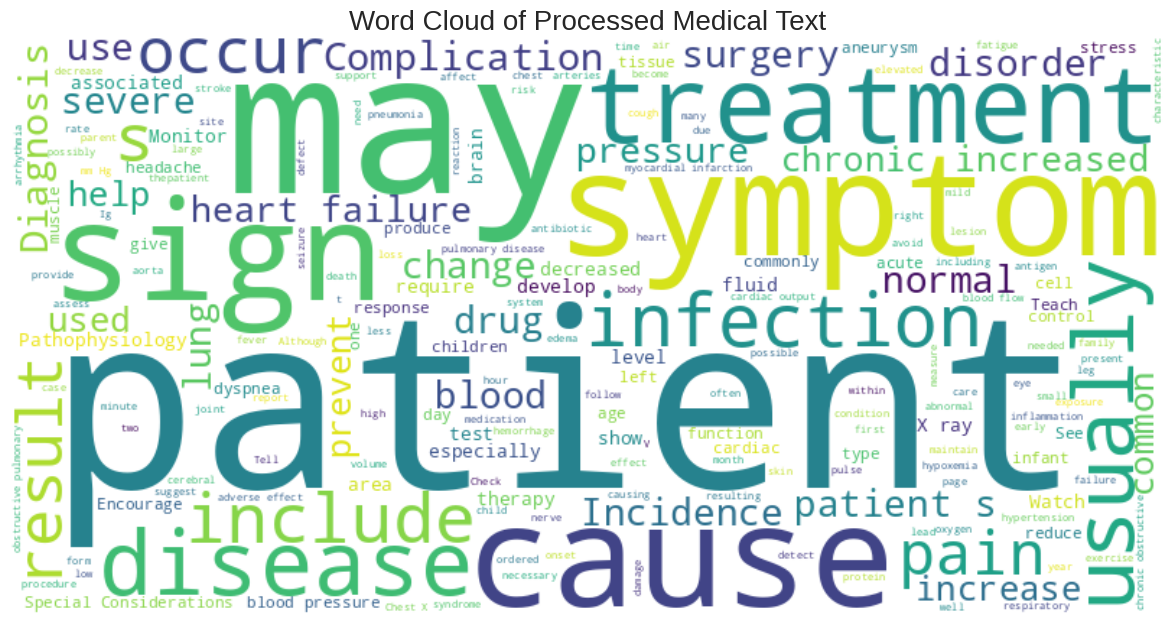

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'processed_data' is your DataFrame containing the 'cleaned_text' column.
# Combine all the cleaned text into a single string
all_text = ' '.join(processed_data['cleaned_text'].tolist())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Processed Medical Text", fontsize=20)
plt.show()


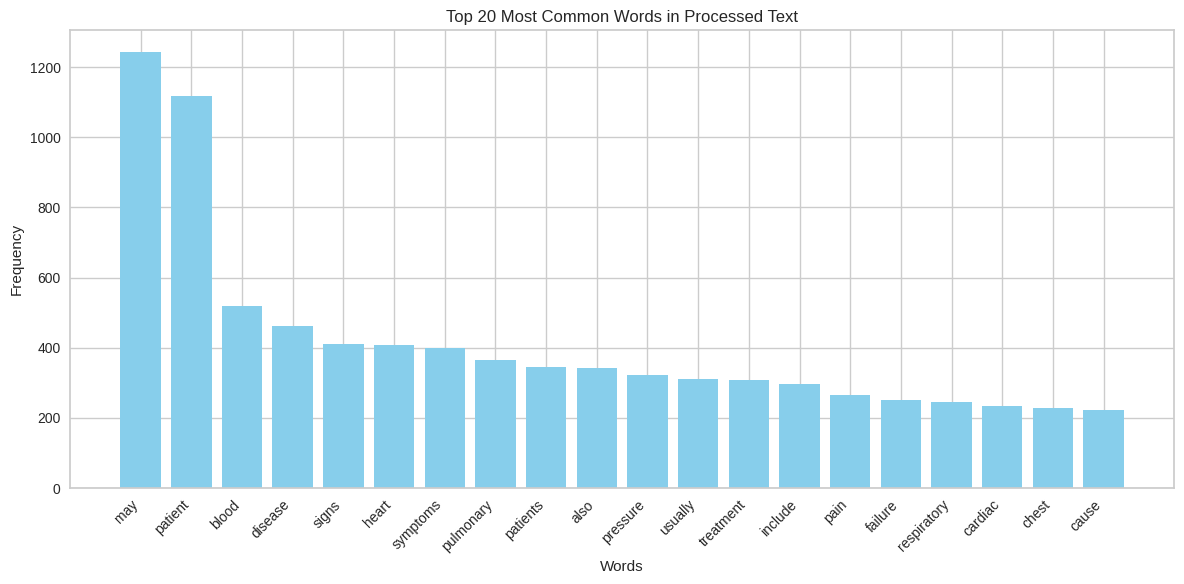

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 1. Combine all cleaned text into one large string
all_text = ' '.join(processed_data['cleaned_text'].tolist())

# 2. Tokenize the text
tokens = word_tokenize(all_text)

# 3. Convert tokens to lowercase and filter out stopwords/punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [
    token.lower() for token in tokens
    if token.isalpha() and token.lower() not in stop_words
]

# 4. Count the most common words
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(20)  # top 20 words

# 5. Prepare data for plotting
words, counts = zip(*most_common_words)

# 6. Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Common Words in Processed Text")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
data.to_csv("patient_details.csv", index=False)

In [ ]:
data.head(4)

,Unnamed: 0,description,medical_specialty,transcription,keywords,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,SUBJECTIVE This -year-old white female pres...,"allergy / immunology, allergic rhinitis, aller...","['SUBJECTIVE', 'This', '-year-old', 'white', '...","[(SUBJECTIVE, NNP), (This, DT), (-year-old, NN...","[(SUBJECTIVE, NNP), (-year-old, NNP), (female,...","[SUBJECTIVE, -year-old, female, present, compl...",60,209
1,1,Consult for laparoscopic gastric bypass.,Dietetics,PAST MEDICAL HISTORY He has difficulty climbin...,"bariatrics, laparoscopic gastric bypass, weigh...","['PAST', 'MEDICAL', 'HISTORY', 'He', 'has', 'd...","[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ...","[(PAST, NNP), (MEDICAL, NNP), (HISTORY, NNP), ...","[PAST, MEDICAL, HISTORY, difficulty, stair, di...",151,348
2,2,Consult for laparoscopic gastric bypass.,Dietetics,HISTORY OF PRESENT ILLNESS I have seen ABC tod...,"bariatrics, laparoscopic gastric bypass, heart...","['HISTORY', 'OF', 'PRESENT', 'ILLNESS', 'I', '...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[(HISTORY, NN), (OF, NNP), (PRESENT, NNP), (IL...","[HISTORY, OF, PRESENT, ILLNESS, ABC, today, ge...",237,705
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-D M-MODE Left atrial enlargement with left...,"cardiovascular / pulmonary, 2-d m-mode, dopple...","['-D', 'M-MODE', 'Left', 'atrial', 'enlargemen...","[(-D, JJ), (M-MODE, NNP), (Left, NNP), (atrial...","[(M-MODE, NNP), (Left, NNP), (enlargement, NN)...","[M-MODE, Left, enlargement, diameter, cm, Norm...",32,62


In [ ]:
#print(data['transcription'][5])

In [ ]:
!pip install numpy==1.23.5 scipy scikit-learn==1.0.2 spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 57.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
2025-04-12 14:08:13.461927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744466893.483928   19593 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from nltk.tokenize import sent_tokenize

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)

class MedicalChatbot:
    def __init__(self, clinical_notes_df, book_content_df):
        """
        Initialize the medical chatbot

        Parameters:
        - clinical_notes_df: DataFrame of clinical notes
        - book_content_df: DataFrame of medical book content
        """
        # Store input DataFrames
        self.clinical_notes = clinical_notes_df
        self.book_content = book_content_df

        # TF-IDF vectorizers for searching
        self.clinical_vectorizer = TfidfVectorizer(stop_words='english')
        self.book_vectorizer = TfidfVectorizer(stop_words='english')

        # Build TF-IDF indices
        self.build_knowledge_indices()

        # Define medical entity keywords
        self._initialize_keywords()

    def _initialize_keywords(self):
        """Initialize medical keyword dictionaries for entity extraction"""
        # Basic custom keywords
        self.disease_keywords = ['disease', 'cancer', 'flu', 'infection', 'hypertension',
                                'diabetes', 'asthma', 'pneumonia', 'bronchitis', 'arthritis',
                                'disorder', 'syndrome', 'illness', 'condition']

        self.symptom_keywords = ['fever', 'cough', 'headache', 'pain', 'nausea',
                                'shortness of breath', 'dizziness', 'fatigue', 'weakness',
                                'swelling', 'vomiting', 'ache', 'rash', 'discomfort']

        self.treatment_keywords = ['treatment', 'medication', 'drug', 'therapy', 'surgery',
                                  'antibiotics', 'prescription', 'dose', 'vaccine', 'injection',
                                  'remedy', 'cure', 'regimen', 'administered']

        self.recovery_keywords = ['days', 'weeks', 'months', 'recovery', 'healing',
                                 'recuperation', 'convalescence', 'rehabilitation',
                                 'prognosis', 'outlook', 'follow-up']

        # Keywords for advice and warning signs
        self.advice_keywords = ['recommend', 'advised', 'should', 'consider', 'suggested',
                               'avoid', 'maintain', 'increase', 'decrease', 'monitor',
                               'consult', 'follow-up', 'important to', 'best to',
                               'ideal', 'beneficial']

        self.warning_keywords = ['warning', 'danger', 'concerning', 'emergency', 'urgent',
                                'critical', 'immediate attention', 'severe', 'worsening',
                                'deterioration', 'fatal', 'life-threatening', 'call 911',
                                'go to hospital', 'alert', 'red flag', 'caution', 'watch for',
                                'concerning sign', 'alarming', 'contact doctor if']

        # Modal verbs for advice detection
        self.modal_verbs = ['should', 'must', 'can', 'could', 'may', 'might', 'need']

        # Action verbs for advice detection
        self.action_verbs = ['take', 'avoid', 'increase', 'decrease', 'monitor', 'schedule']

        # Patient-directed phrases
        self.patient_phrases = ['patient should', 'patients should', 'recommend', 'advised to', 'home care']

    def build_knowledge_indices(self):
        """Build searchable TF-IDF indices for clinical notes and book content."""
        # Clinical notes index
        self.clinical_vectors = self.clinical_vectorizer.fit_transform(
            self.clinical_notes['transcription'].fillna('')
        )
        # Book content index
        self.book_vectors = self.book_vectorizer.fit_transform(
            self.book_content['cleaned_text'].fillna('')
        )

    def extract_medical_entities_from_text(self, text):
        """
        Extract diseases, symptoms, treatments, recovery info, advice and warning signs
        from any text using keyword matching and pattern recognition.
        """
        # Initialize entity buckets
        entities = {
            'diseases': set(),
            'symptoms': set(),
            'treatments': set(),
            'recovery': set(),
            'advice': set(),
            'warning_signs': set()
        }

        # Convert text to lowercase for case-insensitive matching
        text_lower = text.lower()

        # Keyword-based checks
        self._extract_entities_by_keywords(text_lower, entities)

        # Extract advice and warning signs using more sophisticated methods
        sentences = sent_tokenize(text)
        self._extract_advice_from_sentences(sentences, entities)
        self._extract_warning_signs_from_sentences(sentences, entities)

        return entities

    def _extract_entities_by_keywords(self, text_lower, entities):
        """Extract basic medical entities using keyword matching"""
        # Check for disease keywords
        for kw in self.disease_keywords:
            if kw in text_lower:
                entities['diseases'].add(kw)

        # Check for symptom keywords
        for kw in self.symptom_keywords:
            if kw in text_lower:
                entities['symptoms'].add(kw)

        # Check for treatment keywords
        for kw in self.treatment_keywords:
            if kw in text_lower:
                entities['treatments'].add(kw)

        # Check for recovery keywords
        for kw in self.recovery_keywords:
            if kw in text_lower:
                entities['recovery'].add(kw)

    def _extract_advice_from_sentences(self, sentences, entities):
        """
        Extract medical advice from sentences using keyword matching
        and sentence pattern recognition.
        """
        for sent in sentences:
            sent_lower = sent.lower()

            # Check for advice keywords
            has_advice_keyword = any(kw in sent_lower for kw in self.advice_keywords)

            # Check for modal verbs
            has_modal_verb = any(f" {verb} " in f" {sent_lower} " for verb in self.modal_verbs)

            if has_advice_keyword or has_modal_verb:
                # Look for patient-directed advice
                if any(phrase in sent_lower for phrase in self.patient_phrases):
                    entities['advice'].add(sent.strip())
                # Look for general medical recommendations
                elif any(f" {verb} " in f" {sent_lower} " for verb in self.action_verbs):
                    entities['advice'].add(sent.strip())

    def _extract_warning_signs_from_sentences(self, sentences, entities):
        """
        Extract medical warning signs from sentences using keyword matching
        and sentence pattern recognition.
        """
        for sent in sentences:
            sent_lower = sent.lower()

            # Check for warning patterns
            if any(kw in sent_lower for kw in self.warning_keywords):
                entities['warning_signs'].add(sent.strip())

            # Look for conditional warnings ("If X, then seek medical attention")
            if ('if' in sent_lower and any(phrase in sent_lower for phrase in
                                         ['seek', 'call', 'consult', 'emergency', 'doctor',
                                          'physician', 'hospital', 'immediate', 'urgent'])):
                entities['warning_signs'].add(sent.strip())

            # Look for mentions of severe symptoms
            if any(phrase in sent_lower for phrase in
                  ['severe', 'worsening', 'persistent', 'does not improve']):
                if any(symptom in sent_lower for symptom in
                      ['pain', 'fever', 'vomiting', 'bleeding', 'breath', 'consciousness']):
                    entities['warning_signs'].add(sent.strip())

    def search_clinical_notes(self, query):
        """
        Retrieve top 3 matching clinical notes based on TF-IDF similarity.
        """
        query_vector = self.clinical_vectorizer.transform([query])
        similarities = cosine_similarity(query_vector, self.clinical_vectors)[0]

        top_indices = similarities.argsort()[-3:][::-1]
        return self.clinical_notes.iloc[top_indices]

    def search_book_content(self, query):
        """
        Retrieve top 3 matching book passages based on TF-IDF similarity.
        """
        query_vector = self.book_vectorizer.transform([query])
        similarities = cosine_similarity(query_vector, self.book_vectors)[0]

        top_indices = similarities.argsort()[-3:][::-1]
        return self.book_content.iloc[top_indices]

    def generate_response(self, query):
        """
        Generate a structured response that includes:
          1) Insights from Clinical Notes
          2) Insights from Book
          3) Diagnosed Condition, Symptoms, Treatment, Estimated Recovery
          4) Personal Medical Advice
          5) Warning Signs to Watch For
        """
        # 1) Extract entities from the user query
        user_entities = self.extract_medical_entities_from_text(query)

        # 2) Get top clinical notes & top book references
        clinical_matches = self.search_clinical_notes(query)
        book_matches = self.search_book_content(query)

        # 3) Aggregate entities from matched clinical notes
        for _, note in clinical_matches.iterrows():
            note_entities = self.extract_medical_entities_from_text(note['transcription'])
            for entity_type in user_entities:
                user_entities[entity_type].update(note_entities[entity_type])

        # 4) Aggregate entities from matched book passages
        for _, passage in book_matches.iterrows():
            passage_entities = self.extract_medical_entities_from_text(passage['cleaned_text'])
            for entity_type in user_entities:
                user_entities[entity_type].update(passage_entities[entity_type])

        # 5) Format the final multi-part summary
        response_text = self.format_response(query, user_entities, clinical_matches, book_matches)
        return response_text

    def format_response(self, query, aggregated_entities, clinical_matches, book_matches):
        """
        Build a five-part output:
          1) Insights from Clinical Notes
          2) Insights from Book
          3) Overall Summary (Diagnosed Condition, Symptoms, Treatment, Recovery)
          4) Personal Medical Advice
          5) Warning Signs to Watch For
        """
        # Convert sets to comma-separated strings
        disease_str = ", ".join(sorted(aggregated_entities['diseases'])) or "Not Identified"
        symptoms_str = ", ".join(sorted(aggregated_entities['symptoms'])) or "Not Mentioned"
        treatment_str = ", ".join(sorted(aggregated_entities['treatments'])) or "Consult a Doctor"
        recovery_str = ", ".join(sorted(aggregated_entities['recovery'])) or "Varies"

        # 1) Insights from Clinical Notes
        notes_section = ["**1. Insights from Clinical Notes**"]
        if clinical_matches.empty:
            notes_section.append("No relevant clinical notes found.")
        else:
            for _, note in clinical_matches.iterrows():
                desc = note.get('description', 'No description available')
                specialty = note.get('medical_specialty', 'Unknown')
                excerpt = note['transcription'][:200].replace('\n', ' ') + "..."
                notes_section.append(f"- **Description**: {desc}")
                notes_section.append(f"  Specialty: {specialty}")
                notes_section.append(f"  Excerpt: {excerpt}")

        # 2) Insights from Book
        book_section = ["\n**2. Insights from Book**"]
        if book_matches.empty:
            book_section.append("No relevant book passages found.")
        else:
            for _, passage in book_matches.iterrows():
                page_num = passage.get('page_number', 'Unknown')
                excerpt = passage['cleaned_text'][:200].replace('\n', ' ') + "..."
                book_section.append(f"- **Page {page_num}**: {excerpt}")

        # 3) Diagnosed Condition, Symptoms, Treatment, Recovery
        final_summary = ["\n**3. Consolidated Medical Summary**"]
        final_summary.append(f"**Diagnosed Condition(s)**: {disease_str}")
        final_summary.append(f"**Symptoms Identified**: {symptoms_str}")
        final_summary.append(f"**Possible Treatments**: {treatment_str}")
        final_summary.append(f"**Estimated Recovery**: {recovery_str}")

        # 4) Personal Medical Advice
        advice_section = ["\n**4. Personal Medical Advice**"]
        if aggregated_entities['advice']:
            for advice in sorted(aggregated_entities['advice']):
                advice_section.append(f"- {advice}")
        else:
            advice_section.append("No specific personal medical advice found in the sources.")

        # 5) Warning Signs to Watch For
        warning_section = ["\n**5. Warning Signs to Watch For**"]
        if aggregated_entities['warning_signs']:
            for warning in sorted(aggregated_entities['warning_signs']):
                warning_section.append(f"- {warning}")
        else:
            warning_section.append("No specific warning signs mentioned in the sources.")

        # Add disclaimer
        disclaimer = [
            "\n***Disclaimer: This information is for reference only and based on content from our database. "
            "Always consult a healthcare professional for accurate diagnosis, treatment, and personalized advice. "
            "If you experience any warning signs, seek immediate medical attention.***"
        ]

        # Combine everything
        complete_response = [
            f"**Medical Chatbot Summary for Query**: {query}",
            "=" * 60,
            *notes_section,
            *book_section,
            *final_summary,
            *advice_section,
            *warning_section,
            *disclaimer
        ]

        return "\n".join(complete_response)

def medical_chatbot_interface():
    # Load your data
    try:
        clinical_notes_df = pd.read_csv('patient_details.csv')
        book_content_df = pd.read_csv('processed_medical_text.csv')
    except FileNotFoundError:
        print("Error: Required data files not found. Please ensure 'patient_details.csv' and 'processed_medical_text.csv' exist.")
        return

    # Initialize chatbot
    chatbot = MedicalChatbot(clinical_notes_df, book_content_df)

    print("Medical Chatbot is ready. Type 'exit' to stop.")

    while True:
        user_query = input("\nAsk a medical question: ")
        if user_query.lower() == 'exit':
            break

        try:
            response = chatbot.generate_response(user_query)
            print("\n" + response + "\n")
        except Exception as e:
            print(f"Error processing query: {e}")

# For Colab/Jupyter notebooks, you can use this to test:
def test_medical_chatbot():
    # Example data structures if you don't have the CSV files
    clinical_notes_example = pd.DataFrame({
        'transcription': [
            "Patient presents with fever of 102°F, persistent cough, and shortness of breath. Diagnosed with pneumonia.",
            "Patient reports headache and joint pain for 3 days. Advise rest and hydration. If symptoms persist, consider NSAIDs.",
            "Diabetic patient with elevated blood glucose levels. Adjust insulin dosage and monitor diet. Schedule follow-up in 2 weeks."
        ],
        'description': [
            "Pneumonia case",
            "Viral infection follow-up",
            "Diabetes management"
        ],
        'medical_specialty': [
            "Pulmonology",
            "General practice",
            "Endocrinology"
        ]
    })

    book_content_example = pd.DataFrame({
        'cleaned_text': [
            "Pneumonia is an infection of the lungs that can cause fever, cough, and difficulty breathing. Treatment typically includes antibiotics and rest.",
            "Diabetes requires careful management of blood glucose levels through medication, diet, and exercise. Regular monitoring is essential.",
            "Warning signs that require immediate medical attention include severe chest pain, sudden shortness of breath, or loss of consciousness."
        ],
        'page_number': [123, 456, 789]
    })

    # Initialize and test chatbot
    chatbot = MedicalChatbot(clinical_notes_example, book_content_example)
    test_query = "I have a fever, cough, and trouble breathing. What could it be?"
    response = chatbot.generate_response(test_query)
    print(response)

    return chatbot  # Return for further testing or inspection

if __name__ == "__main__":
    medical_chatbot_interface()

Medical Chatbot is ready. Type 'exit' to stop.

Ask a medical question: I am suffering from fever and cough

**Medical Chatbot Summary for Query**: I am suffering from fever and cough
**1. Insights from Clinical Notes**
- **Description**:  A 5-month-old boy brought by his parents because of 2 days of cough. 
  Specialty:  Consult - History and Phy.
  Excerpt: CHIEF COMPLAINT  A  -month-old boy with cough  HISTORY OF PRESENT ILLNESS  A  -month-old boy brought by his parents because of   days of cough   Mother took him when cough started   days go to Clinic ...
- **Description**:  A 5-month-old boy brought by his parents because of 2 days of cough. 
  Specialty:  Pediatrics - Neonatal
  Excerpt: CHIEF COMPLAINT  A  -month-old boy with cough  HISTORY OF PRESENT ILLNESS  A  -month-old boy brought by his parents because of   days of cough   Mother took him when cough started   days go to Clinic ...
- **Description**:  This 68-year-old man presents to the emergency department for three days 